In [1]:
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("white")
import glob
import json
import os
import sys
import shutil

def save_fig(ax, title="", pdfname="plot.pdf"):
    if title != "":
        ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight")
    

In [2]:
dclick = pd.read_csv("../evaluation_image_appeal_test_1/stats_clickworker.csv")
dclick["filename"] = dclick["filename"].apply(lambda x: x.replace("static/images/", ""))
d(dclick.head())

filename       std        ci  \
0  500px_cc0/medium/100327907_some_days_in_winter...  1.092398  0.450920   
1  500px_cc0/medium/1003502191_Flat_lay_of_busine...  1.099766  0.475575   
2           500px_cc0/medium/1011015162_Anemone-.jpg  0.978093  0.403737   
3           500px_cc0/medium/1011015165_Anemone-.jpg  1.144703  0.427439   
4           500px_cc0/medium/1011015217_Anemone-.jpg  0.888523  0.415842   

        mos  num_ratings  count_1  count_2  count_3  count_4  count_5  
0  2.880000           25        4        3       11        6        1  
1  2.869565           23        2        7        8        4        2  
2  2.960000           25        1        7       11        4        2  
3  2.000000           30       14        6        7        2        1  
4  2.500000           20        2        9        6        3        0

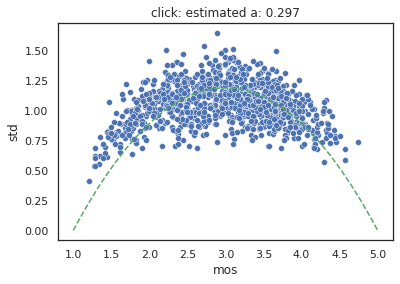

In [3]:
def sos_plot(df, title=""):
    assert("mos" in df.columns)
    assert("std" in df.columns)
    
    sns.set(rc={'figure.figsize':(6,4)})
    sns.set_style("white")

    ax = sns.scatterplot(x="mos", y="std", data=df)
    x_data = df["mos"].values
    y_data = df["std"].replace(np.NaN, 0).values

    from scipy.optimize import curve_fit

    def fitting_function(x, a):
        return (x - 1) * (x - 5) * (-a)

    popt, pcov = curve_fit(fitting_function, x_data, y_data) 


    x = np.linspace(1, 5, 100)
    ax.plot(x, fitting_function(x, *popt), 'g--')
    ax.set_title(title + f" estimated a: {popt[0].round(3)}")
    return ax

save_fig(sos_plot(dclick, "click:"), pdfname="sos_click.pdf")

In [4]:
dtui = pd.read_csv("../evaluation_image_appeal_test_1/stats_tuil.csv")
dtui["filename"] = dtui["filename"].apply(lambda x: x.replace("static/images/", ""))
d(dtui.head())

filename       std        ci  \
0  500px_cc0/medium/100327907_some_days_in_winter...  0.832971  0.351733   
1  500px_cc0/medium/1003502191_Flat_lay_of_busine...  1.325393  0.547095   
2           500px_cc0/medium/1011015162_Anemone-.jpg  1.268143  0.611225   
3           500px_cc0/medium/1011015165_Anemone-.jpg  0.746101  0.307975   
4           500px_cc0/medium/1011015217_Anemone-.jpg  1.288786  0.509827   

        mos  num_ratings  count_1  count_2  count_3  count_4  count_5  
0  2.208333           24        3       16        2        3        0  
1  3.440000           25        3        2        8        5        7  
2  2.947368           19        2        6        5        3        3  
3  1.840000           25        9       11        5        0        0  
4  2.259259           27       10        7        5        3        2

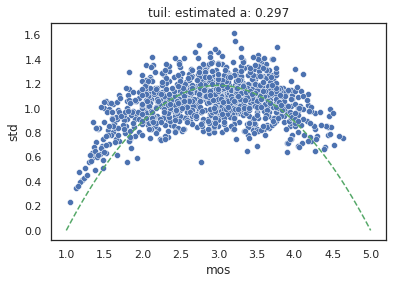

In [5]:
save_fig(sos_plot(dtui, "tuil:"), pdfname="sos_tuil.pdf")

In [6]:

sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("white")

In [7]:
# unify ratings
dratings = pd.DataFrame()

# koniq
dk = pd.read_csv("koniq10k/ratings.csv")[["file", "mos"]]
dk["file"] = dk["file"].apply(lambda x: x.replace("../downloader/koniq10k/photos/urls/", "koniq10k/medium/"))
dk["db"] = "koniq"
d(dk)
dratings = dratings.append(dk, ignore_index=True)
d(dratings)

file     mos     db
0       koniq10k/medium/16057476.jpg  2.5528  koniq
1      koniq10k/medium/145517507.jpg  2.5289  koniq
2      koniq10k/medium/269509962.jpg  3.1583  koniq
3      koniq10k/medium/331340631.jpg  2.9500  koniq
4      koniq10k/medium/364777572.jpg  3.3083  koniq
..                               ...     ...    ...
195  koniq10k/medium/11139580153.jpg  2.6583  koniq
196  koniq10k/medium/11232665444.jpg  2.1750  koniq
197  koniq10k/medium/11270280904.jpg  2.2833  koniq
198  koniq10k/medium/11341117543.jpg  3.1833  koniq
199  koniq10k/medium/11546100824.jpg  3.5500  koniq

[200 rows x 3 columns]

file     mos     db
0       koniq10k/medium/16057476.jpg  2.5528  koniq
1      koniq10k/medium/145517507.jpg  2.5289  koniq
2      koniq10k/medium/269509962.jpg  3.1583  koniq
3      koniq10k/medium/331340631.jpg  2.9500  koniq
4      koniq10k/medium/364777572.jpg  3.3083  koniq
..                               ...     ...    ...
195  koniq10k/medium/11139580153.jpg  2.6583  koniq
196  koniq10k/medium/11232665444.jpg  2.1750  koniq
197  koniq10k/medium/11270280904.jpg  2.2833  koniq
198  koniq10k/medium/11341117543.jpg  3.1833  koniq
199  koniq10k/medium/11546100824.jpg  3.5500  koniq

[200 rows x 3 columns]

/home/sgoering/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


image  \
0    /home/sgoering/shares/avt_prio2/avt-work_sftp/...   
1    /home/sgoering/shares/avt_prio2/avt-work_sftp/...   
2    /home/sgoering/shares/avt_prio2/avt-work_sftp/...   
3    /home/sgoering/shares/avt_prio2/avt-work_sftp/...   
4    /home/sgoering/shares/avt_prio2/avt-work_sftp/...   
..                                                 ...   
207  /home/sgoering/shares/avt_prio2/avt-work_sftp/...   
208  /home/sgoering/shares/avt_prio2/avt-work_sftp/...   
209  /home/sgoering/shares/avt_prio2/avt-work_sftp/...   
210  /home/sgoering/shares/avt_prio2/avt-work_sftp/...   
211  /home/sgoering/shares/avt_prio2/avt-work_sftp/...   

                                                   url  count  mean  max  min  \
0    https://farm1.staticflickr.com/336/20161142751...      5   0.2    1    0   
1    https://farm1.staticflickr.com/300/20203544192...      5   0.8    4    0   
2    https://farm1.staticflickr.com/284/19899946970...      5   0.6    3    0   
3    https://farm1.staticflickr.com/316/20089403335...      5   0.6    3    0   
4    https://farm1.staticflickr.com/263/19568286334...      5   0.0    0    0   
..                                                 ...    ...   ...  ...  ...   
207  https://farm1.staticflickr.com/286/19998340455...      5   5.0    5    5   
208  https://farm1.staticflickr.com/263/20317768422...      5   5.0    5    5   
209  https://farm1.staticflickr.com/297/19951672000...      5   5.0    5    5   
210  https://farm1.staticflickr.com/399/19971092260...      5   5.0    5    5   
211  https://farm1.staticflickr.com/301/19659786384...      5   5.0    5    5   

     norm_mean  5i_mean   mos  \
0         0.04        0  1.16   
1         0.16        0  1.64   
2         0.12        0  1.48   
3         0.12        0  1.48   
4         0.00        0  1.00   
..         ...      ...   ...   
207       1.00        5  5.00   
208       1.00        5  5.00   
209       1.00        5  5.00   
210       1.00        5  5.00   
211       1.00        5  5.00   

                                                  file  
0    aadb/medium/farm1_336_20161142751_c10d128c7d_b...  
1    aadb/medium/farm1_300_20203544192_66922b649b_b...  
2    aadb/medium/farm1_284_19899946970_884f05cb1e_b...  
3    aadb/medium/farm1_316_20089403335_1e1e856fcd_b...  
4    aadb/medium/farm1_263_19568286334_8d2ea52ce8_b...  
..                                                 ...  
207  aadb/medium/farm1_286_19998340455_4629caa4ca_b...  
208  aadb/medium/farm1_263_20317768422_4a8537aff4_b...  
209  aadb/medium/farm1_297_19951672000_af582f2811_b...  
210  aadb/medium/farm1_399_19971092260_7053a35a7d_b...  
211  aadb/medium/farm1_301_19659786384_c86c7e1f30_b...  

[212 rows x 10 columns]

file     mos     db
0                         koniq10k/medium/16057476.jpg  2.5528  koniq
1                        koniq10k/medium/145517507.jpg  2.5289  koniq
2                        koniq10k/medium/269509962.jpg  3.1583  koniq
3                        koniq10k/medium/331340631.jpg  2.9500  koniq
4                        koniq10k/medium/364777572.jpg  3.3083  koniq
..                                                 ...     ...    ...
407  aadb/medium/farm1_286_19998340455_4629caa4ca_b...  5.0000   aadb
408  aadb/medium/farm1_263_20317768422_4a8537aff4_b...  5.0000   aadb
409  aadb/medium/farm1_297_19951672000_af582f2811_b...  5.0000   aadb
410  aadb/medium/farm1_399_19971092260_7053a35a7d_b...  5.0000   aadb
411  aadb/medium/farm1_301_19659786384_c86c7e1f30_b...  5.0000   aadb

[412 rows x 3 columns]

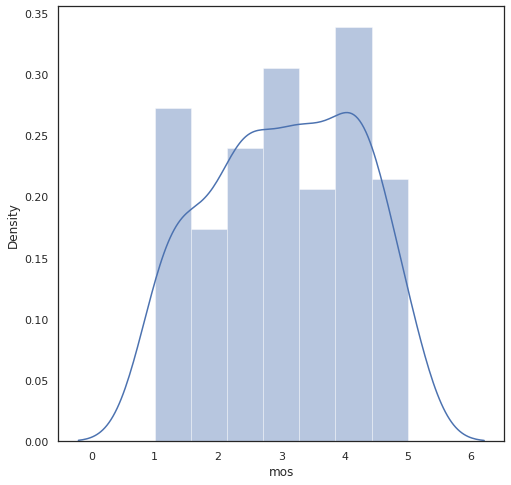

In [8]:
# aaab
daadb = pd.read_csv("aadb/ratings.csv") # [["file", "mos", "mos_std"]]
# scale [0,5] mean value to [1,5]
daadb["mos"] = 1 + daadb["mean"] / 5 * 4
daadb["file"] = daadb["image"].apply(
    lambda x: x.replace("/home/sgoering/shares/avt_prio2/avt-work_sftp/", "").replace("datasets/image/AADB/datasetImages_originalSize/", "aadb/medium/")
)
sns.distplot(daadb["mos"])
d(daadb)
daadb["db"] = "aadb"

dratings = dratings.append(daadb[["file", "mos", "db"]], ignore_index=True)
d(dratings)

file       mos   db
0     ava/medium/43085.jpg  1.646574  ava
1    ava/medium/776337.jpg  1.937173  ava
2    ava/medium/638912.jpg  1.850962  ava
3     ava/medium/74764.jpg  1.753663  ava
4    ava/medium/335761.jpg  1.786557  ava
..                     ...       ...  ...
196  ava/medium/780373.jpg  4.360236  ava
197   ava/medium/51662.jpg  4.334936  ava
198  ava/medium/267110.jpg  4.612699  ava
199  ava/medium/727495.jpg  4.486301  ava
200    ava/medium/9482.jpg  5.132415  ava

[201 rows x 3 columns]

/home/sgoering/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


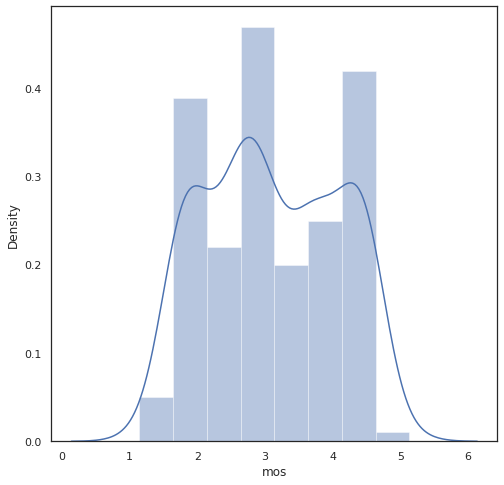

In [9]:
# ava
dava = pd.read_csv("ava/ratings.csv")[["file", "mos"]] 
dava["mos"] = 5 * dava["mos"] / 8  # its not clear how the paper did the rating, from 1-9 , however the dist shows no values for 1

dava["file"] = dava["file"].apply(lambda x: "ava/medium/" + os.path.basename(x))
dava["db"] = "ava"
d(dava)

sns.distplot(dava["mos"])

dratings = dratings.append(dava[["file", "mos", "db"]], ignore_index=True)


In [10]:
d(dratings)
d(dclick)
d(dtui)
dcombined = pd.merge(dclick, dratings, left_on="filename", right_on="file", suffixes=("_click", "_"))

dtui["mos_tui"] = dtui["mos"]
dtui = dtui[["mos_tui", "filename"]]

dcombined = pd.merge(dcombined, dtui, left_on="file", right_on="filename")

d(dcombined)

file       mos     db
0     koniq10k/medium/16057476.jpg  2.552800  koniq
1    koniq10k/medium/145517507.jpg  2.528900  koniq
2    koniq10k/medium/269509962.jpg  3.158300  koniq
3    koniq10k/medium/331340631.jpg  2.950000  koniq
4    koniq10k/medium/364777572.jpg  3.308300  koniq
..                             ...       ...    ...
608          ava/medium/780373.jpg  4.360236    ava
609           ava/medium/51662.jpg  4.334936    ava
610          ava/medium/267110.jpg  4.612699    ava
611          ava/medium/727495.jpg  4.486301    ava
612            ava/medium/9482.jpg  5.132415    ava

[613 rows x 3 columns]

filename       std        ci  \
0     500px_cc0/medium/100327907_some_days_in_winter...  1.092398  0.450920   
1     500px_cc0/medium/1003502191_Flat_lay_of_busine...  1.099766  0.475575   
2              500px_cc0/medium/1011015162_Anemone-.jpg  0.978093  0.403737   
3              500px_cc0/medium/1011015165_Anemone-.jpg  1.144703  0.427439   
4              500px_cc0/medium/1011015217_Anemone-.jpg  0.888523  0.415842   
...                                                 ...       ...       ...   
1053          pixabay_first50k/medium/woman-3585065.jpg  1.105013  0.517162   
1054          pixabay_first50k/medium/woman-3895501.jpg  1.228321  0.592032   
1055          pixabay_first50k/medium/woman-5341680.jpg  1.114741  0.573147   
1056          pixabay_first50k/medium/women-1209678.jpg  1.063219  0.448958   
1057           pixabay_first50k/medium/women-816255.jpg  1.228821  0.507232   

           mos  num_ratings  count_1  count_2  count_3  count_4  count_5  
0     2.880000           25        4        3       11        6        1  
1     2.869565           23        2        7        8        4        2  
2     2.960000           25        1        7       11        4        2  
3     2.000000           30       14        6        7        2        1  
4     2.500000           20        2        9        6        3        0  
...        ...          ...      ...      ...      ...      ...      ...  
1053  3.800000           20        1        1        5        7        6  
1054  2.789474           19        3        5        6        3        2  
1055  2.352941           17        4        6        5        1        1  
1056  3.000000           24        2        5       10        5        2  
1057  3.480000           25        2        3        7        7        6  

[1058 rows x 10 columns]

filename       std        ci  \
0     500px_cc0/medium/100327907_some_days_in_winter...  0.832971  0.351733   
1     500px_cc0/medium/1003502191_Flat_lay_of_busine...  1.325393  0.547095   
2              500px_cc0/medium/1011015162_Anemone-.jpg  1.268143  0.611225   
3              500px_cc0/medium/1011015165_Anemone-.jpg  0.746101  0.307975   
4              500px_cc0/medium/1011015217_Anemone-.jpg  1.288786  0.509827   
...                                                 ...       ...       ...   
1052          pixabay_first50k/medium/woman-3585065.jpg  1.416221  0.502170   
1053          pixabay_first50k/medium/woman-3895501.jpg  1.365479  0.519400   
1054          pixabay_first50k/medium/woman-5341680.jpg  1.046788  0.377407   
1055          pixabay_first50k/medium/women-1209678.jpg  1.227649  0.485642   
1056           pixabay_first50k/medium/women-816255.jpg  1.121011  0.462731   

           mos  num_ratings  count_1  count_2  count_3  count_4  count_5  
0     2.208333           24        3       16        2        3        0  
1     3.440000           25        3        2        8        5        7  
2     2.947368           19        2        6        5        3        3  
3     1.840000           25        9       11        5        0        0  
4     2.259259           27       10        7        5        3        2  
...        ...          ...      ...      ...      ...      ...      ...  
1052  3.454545           33        5        3        7        8       10  
1053  2.310345           29       12        6        2        8        1  
1054  2.468750           32        7        9       10        6        0  
1055  3.259259           27        2        5       10        4        6  
1056  3.440000           25        1        4        8        7        5  

[1057 rows x 10 columns]

filename_x       std        ci  \
0    aadb/medium/farm1_256_20108408355_7235405d1d_b...  0.769670  0.325003   
1    aadb/medium/farm1_257_20145308899_8fecab3706_b...  1.092035  0.393721   
2    aadb/medium/farm1_259_19904572149_5e703aba8f_b...  1.007663  0.407004   
3    aadb/medium/farm1_259_19991817930_f00fc0becd_b...  1.136708  0.531996   
4    aadb/medium/farm1_261_19989471851_d7e99475e8_b...  0.888844  0.394091   
..                                                 ...       ...       ...   
561                     koniq10k/medium/9654462771.jpg  1.121298  0.540448   
562                     koniq10k/medium/9668766101.jpg  1.238706  0.480320   
563                     koniq10k/medium/9768426856.jpg  1.204281  0.580445   
564                     koniq10k/medium/9898091624.jpg  1.065947  0.413331   
565                      koniq10k/medium/992920521.jpg  0.972567  0.431212   

     mos_click  num_ratings  count_1  count_2  count_3  count_4  count_5  \
0     2.375000           24        3       10       10        1        0   
1     1.968750           32       13       11        6        0        2   
2     1.846154           26       12        8        5        0        1   
3     2.650000           20        3        6        8        1        2   
4     2.863636           22        1        7        8        6        0   
..         ...          ...      ...      ...      ...      ...      ...   
561   3.578947           19        0        4        5        5        5   
562   2.857143           28        4        8        7        6        3   
563   3.315789           19        2        3        3        9        2   
564   3.107143           28        3        3       12        8        2   
565   3.227273           22        0        6        7        7        2   

                                                  file    mos_     db  \
0    aadb/medium/farm1_256_20108408355_7235405d1d_b...  3.8800   aadb   
1    aadb/medium/farm1_257_20145308899_8fecab3706_b...  2.9200   aadb   
2    aadb/medium/farm1_259_19904572149_5e703aba8f_b...  2.2800   aadb   
3    aadb/medium/farm1_259_19991817930_f00fc0becd_b...  4.3600   aadb   
4    aadb/medium/farm1_261_19989471851_d7e99475e8_b...  4.3600   aadb   
..                                                 ...     ...    ...   
561                     koniq10k/medium/9654462771.jpg  3.9500  koniq   
562                     koniq10k/medium/9668766101.jpg  2.1667  koniq   
563                     koniq10k/medium/9768426856.jpg  3.1167  koniq   
564                     koniq10k/medium/9898091624.jpg  2.8500  koniq   
565                      koniq10k/medium/992920521.jpg  3.4333  koniq   

      mos_tui                                         filename_y  
0    2.720000  aadb/medium/farm1_256_20108408355_7235405d1d_b...  
1    2.300000  aadb/medium/farm1_257_20145308899_8fecab3706_b...  
2    1.916667  aadb/medium/farm1_259_19904572149_5e703aba8f_b...  
3    2.300000  aadb/medium/farm1_259_19991817930_f00fc0becd_b...  
4    2.730769  aadb/medium/farm1_261_19989471851_d7e99475e8_b...  
..        ...                                                ...  
561  4.117647                     koniq10k/medium/9654462771.jpg  
562  2.290323                     koniq10k/medium/9668766101.jpg  
563  3.047619                     koniq10k/medium/9768426856.jpg  
564  2.818182                     koniq10k/medium/9898091624.jpg  
565  3.000000                      koniq10k/medium/992920521.jpg  

[566 rows x 15 columns]

In [11]:
set(dratings["file"].values) - set(dclick["filename"].values)

# the missing files are the files that have been excluded

{'aadb/medium/farm1_265_20154984142_7b03f70b4b_b.jpg',
 'aadb/medium/farm1_275_20007827580_0736e446d1_b.jpg',
 'aadb/medium/farm1_278_19927081039_69ce420f46_b.jpg',
 'aadb/medium/farm1_284_19899946970_884f05cb1e_b.jpg',
 'aadb/medium/farm1_293_20183043961_17b5521f09_b.jpg',
 'aadb/medium/farm1_300_20203544192_66922b649b_b.jpg',
 'aadb/medium/farm1_307_20211730775_b284029e18_b.jpg',
 'aadb/medium/farm1_308_19642604434_a5f6b6a66e_b.jpg',
 'aadb/medium/farm1_314_20007088809_8fc9662db2_b.jpg',
 'aadb/medium/farm1_316_20089403335_1e1e856fcd_b.jpg',
 'aadb/medium/farm1_321_19499240343_3b68bd27c9_b.jpg',
 'aadb/medium/farm1_323_20148008972_f57613a991_b.jpg',
 'aadb/medium/farm1_355_20066593675_8251b3dd86_b.jpg',
 'aadb/medium/farm1_357_20191139945_a726272542_b.jpg',
 'aadb/medium/farm1_360_19450577363_c683eb979d_b.jpg',
 'aadb/medium/farm1_382_20242119196_6e468b89fa_b.jpg',
 'aadb/medium/farm1_386_19966144919_177f918c62_b.jpg',
 'aadb/medium/farm1_391_19798851399_148ffae7bb_b.jpg',
 'aadb/med

In [12]:
set(dcombined["db"].values)

{'aadb', 'ava', 'koniq'}

mos_click      mos_
mos_click   1.000000  0.617658
mos_        0.617658  1.000000

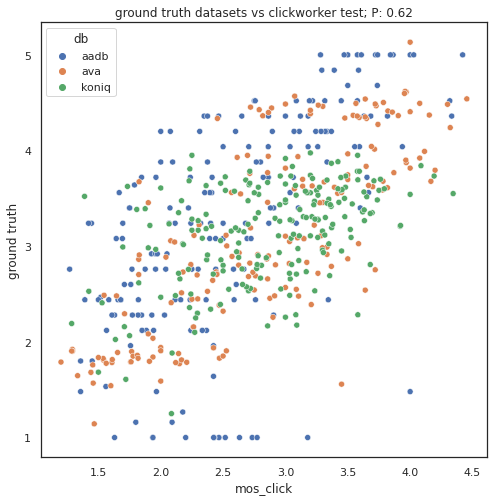

In [10]:

ax = sns.scatterplot(x="mos_click", y="mos_", data=dcombined, hue="db")

pcorr = dcombined[["mos_click", "mos_"]].corr()["mos_click"].values[1].round(2)

ax.set_ylabel("ground truth")
#dcombined[["mos_click", "mos_"]].plot(x="mos_click", y="mos_", kind="scatter")

save_fig(ax, f"ground truth datasets vs clickworker test; P: {pcorr}", "gt_vs_click.pdf")

d(dcombined[["mos_click", "mos_"]].corr())

mos_tui     mos_
mos_tui  1.00000  0.65166
mos_     0.65166  1.00000

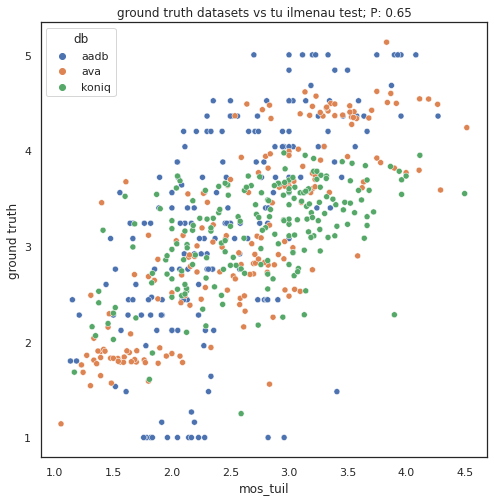

In [11]:
ax = sns.scatterplot(x="mos_tui", y="mos_", data=dcombined, hue="db")

pcorr = dcombined[["mos_tui", "mos_"]].corr()["mos_tui"].values[1].round(2)


ax.set_ylabel("ground truth")
ax.set_xlabel("mos_tuil")

save_fig(ax, f"ground truth datasets vs tu ilmenau test; P: {pcorr}", "gt_vs_tuil.pdf")


d(dcombined[["mos_tui", "mos_"]].corr())

In [23]:
# per dataset correlation

d(dcombined)
values = []
for i, g in dcombined.groupby(by="db"):
    print(i)
    
    r = [
        {
            "db": i,
            "gt": "mos_click",
            "P": g[["mos_", "mos_click"]].corr(method="pearson")["mos_click"].values[0],
            "S": g[["mos_", "mos_click"]].corr(method="spearman")["mos_click"].values[0],
            "K": g[["mos_", "mos_click"]].corr(method="kendall")["mos_click"].values[0]
        },
        {
            "db": i,
            "gt": "mos_tuil",
            "P": g[["mos_", "mos_tui"]].corr(method="pearson")["mos_tui"].values[0],
            "S": g[["mos_", "mos_tui"]].corr(method="spearman")["mos_tui"].values[0],
            "K": g[["mos_", "mos_tui"]].corr(method="kendall")["mos_tui"].values[0]
        },
    ]
    values.extend(r)
    
print(values)
dcorr = pd.DataFrame(values)
print(dcorr.round(2).to_latex(index=False))

filename_x       std        ci  \
0    aadb/medium/farm1_256_20108408355_7235405d1d_b...  0.769670  0.325003   
1    aadb/medium/farm1_257_20145308899_8fecab3706_b...  1.092035  0.393721   
2    aadb/medium/farm1_259_19904572149_5e703aba8f_b...  1.007663  0.407004   
3    aadb/medium/farm1_259_19991817930_f00fc0becd_b...  1.136708  0.531996   
4    aadb/medium/farm1_261_19989471851_d7e99475e8_b...  0.888844  0.394091   
..                                                 ...       ...       ...   
561                     koniq10k/medium/9654462771.jpg  1.121298  0.540448   
562                     koniq10k/medium/9668766101.jpg  1.238706  0.480320   
563                     koniq10k/medium/9768426856.jpg  1.204281  0.580445   
564                     koniq10k/medium/9898091624.jpg  1.065947  0.413331   
565                      koniq10k/medium/992920521.jpg  0.972567  0.431212   

     mos_click  num_ratings  count_1  count_2  count_3  count_4  count_5  \
0     2.375000           24        3       10       10        1        0   
1     1.968750           32       13       11        6        0        2   
2     1.846154           26       12        8        5        0        1   
3     2.650000           20        3        6        8        1        2   
4     2.863636           22        1        7        8        6        0   
..         ...          ...      ...      ...      ...      ...      ...   
561   3.578947           19        0        4        5        5        5   
562   2.857143           28        4        8        7        6        3   
563   3.315789           19        2        3        3        9        2   
564   3.107143           28        3        3       12        8        2   
565   3.227273           22        0        6        7        7        2   

                                                  file    mos_     db  \
0    aadb/medium/farm1_256_20108408355_7235405d1d_b...  3.8800   aadb   
1    aadb/medium/farm1_257_20145308899_8fecab3706_b...  2.9200   aadb   
2    aadb/medium/farm1_259_19904572149_5e703aba8f_b...  2.2800   aadb   
3    aadb/medium/farm1_259_19991817930_f00fc0becd_b...  4.3600   aadb   
4    aadb/medium/farm1_261_19989471851_d7e99475e8_b...  4.3600   aadb   
..                                                 ...     ...    ...   
561                     koniq10k/medium/9654462771.jpg  3.9500  koniq   
562                     koniq10k/medium/9668766101.jpg  2.1667  koniq   
563                     koniq10k/medium/9768426856.jpg  3.1167  koniq   
564                     koniq10k/medium/9898091624.jpg  2.8500  koniq   
565                      koniq10k/medium/992920521.jpg  3.4333  koniq   

      mos_tui                                         filename_y  
0    2.720000  aadb/medium/farm1_256_20108408355_7235405d1d_b...  
1    2.300000  aadb/medium/farm1_257_20145308899_8fecab3706_b...  
2    1.916667  aadb/medium/farm1_259_19904572149_5e703aba8f_b...  
3    2.300000  aadb/medium/farm1_259_19991817930_f00fc0becd_b...  
4    2.730769  aadb/medium/farm1_261_19989471851_d7e99475e8_b...  
..        ...                                                ...  
561  4.117647                     koniq10k/medium/9654462771.jpg  
562  2.290323                     koniq10k/medium/9668766101.jpg  
563  3.047619                     koniq10k/medium/9768426856.jpg  
564  2.818182                     koniq10k/medium/9898091624.jpg  
565  3.000000                      koniq10k/medium/992920521.jpg  

[566 rows x 15 columns]

aadb
ava
koniq
[{'db': 'aadb', 'gt': 'mos_click', 'P': 0.6141933619817879, 'S': 0.651460166292533, 'K': 0.4773877193930818}, {'db': 'aadb', 'gt': 'mos_tuil', 'P': 0.6351577226725847, 'S': 0.6699807667925214, 'K': 0.48990966079253423}, {'db': 'ava', 'gt': 'mos_click', 'P': 0.7768665266385486, 'S': 0.7719057441220315, 'K': 0.5771484219579329}, {'db': 'ava', 'gt': 'mos_tuil', 'P': 0.8105358522064617, 'S': 0.8121260782368399, 'K': 0.6103582835837393}, {'db': 'koniq', 'gt': 'mos_click', 'P': 0.4627137367709867, 'S': 0.4245137932249359, 'K': 0.2949610962717517}, {'db': 'koniq', 'gt': 'mos_tuil', 'P': 0.5488629757431011, 'S': 0.5295110296079405, 'K': 0.3733749673073752}]
\begin{tabular}{llrrr}
\toprule
    db &         gt &     P &     S &     K \\
\midrule
  aadb &  mos\_click &  0.61 &  0.65 &  0.48 \\
  aadb &   mos\_tuil &  0.64 &  0.67 &  0.49 \\
   ava &  mos\_click &  0.78 &  0.77 &  0.58 \\
   ava &   mos\_tuil &  0.81 &  0.81 &  0.61 \\
 koniq &  mos\_click &  0.46 &  0.42 &  0.29 \\

filename       std        ci  \
0     500px_cc0/medium/100327907_some_days_in_winter...  1.092398  0.450920   
1     500px_cc0/medium/1003502191_Flat_lay_of_busine...  1.099766  0.475575   
2              500px_cc0/medium/1011015162_Anemone-.jpg  0.978093  0.403737   
3              500px_cc0/medium/1011015165_Anemone-.jpg  1.144703  0.427439   
4              500px_cc0/medium/1011015217_Anemone-.jpg  0.888523  0.415842   
...                                                 ...       ...       ...   
1052          pixabay_first50k/medium/woman-3585065.jpg  1.105013  0.517162   
1053          pixabay_first50k/medium/woman-3895501.jpg  1.228321  0.592032   
1054          pixabay_first50k/medium/woman-5341680.jpg  1.114741  0.573147   
1055          pixabay_first50k/medium/women-1209678.jpg  1.063219  0.448958   
1056           pixabay_first50k/medium/women-816255.jpg  1.228821  0.507232   

           mos  num_ratings  count_1  count_2  count_3  count_4  count_5  \
0     2.880000           25        4        3       11        6        1   
1     2.869565           23        2        7        8        4        2   
2     2.960000           25        1        7       11        4        2   
3     2.000000           30       14        6        7        2        1   
4     2.500000           20        2        9        6        3        0   
...        ...          ...      ...      ...      ...      ...      ...   
1052  3.800000           20        1        1        5        7        6   
1053  2.789474           19        3        5        6        3        2   
1054  2.352941           17        4        6        5        1        1   
1055  3.000000           24        2        5       10        5        2   
1056  3.480000           25        2        3        7        7        6   

       mos_tui  mos_click  mos_tuil  
0     2.208333   2.880000  2.208333  
1     3.440000   2.869565  3.440000  
2     2.947368   2.960000  2.947368  
3     1.840000   2.000000  1.840000  
4     2.259259   2.500000  2.259259  
...        ...        ...       ...  
1052  3.454545   3.800000  3.454545  
1053  2.310345   2.789474  2.310345  
1054  2.468750   2.352941  2.468750  
1055  3.259259   3.000000  3.259259  
1056  3.440000   3.480000  3.440000  

[1057 rows x 13 columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


mos_tuil  mos_click
mos_tuil   1.000000   0.871621
mos_click  0.871621   1.000000

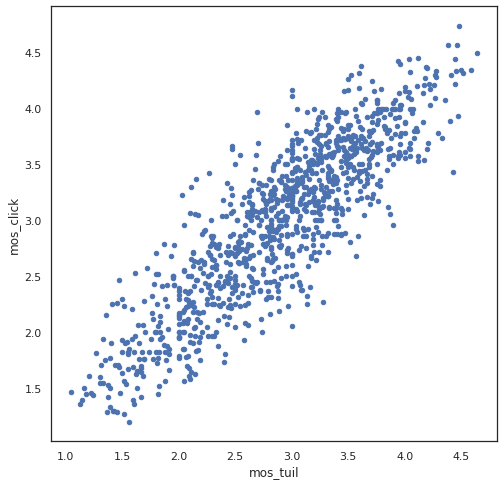

In [20]:
dm = pd.merge(dclick, dtui, left_on="filename", right_on="filename", suffixes=("_click", "_tuil"))
dm["mos_click"] = dm["mos"]
dm["mos_tuil"] = dm["mos_tui"]
d(dm)
dm[["mos_tuil", "mos_click"]].plot(x="mos_tuil", y="mos_click", kind="scatter")

d(dm[["mos_tuil", "mos_click"]].corr())

In [14]:
# checkout outliers
from IPython.display import Image 

def show_img(filename):
    d(Image(filename, width = 200))
    
dm["diff"] = (dm["mos_tuil"] - dm["mos_click"])

dm["abs_diff"] = dm["diff"].apply(lambda x: np.abs(x))
print(dm["diff"].max(), dm["diff"].min())
dm = dm[["filename", "mos_tuil", "mos_click", "diff", "abs_diff"]].sort_values(by="abs_diff", ascending=False)

d(dm.head())
print("images with >1 diff", len(dm[dm["abs_diff"] > 1.0]), len(dm))
print("images with >0.5 diff", len(dm[dm["abs_diff"] > 0.5]), len(dm))
print("images with >0.25 diff", len(dm[dm["abs_diff"] > 0.25]), len(dm))

1.0050505050505047 -1.2730978260869565


filename  mos_tuil  mos_click  \
886     pixabay_first50k/medium/castle-2744263.jpg  2.695652   3.968750   
379                          ava/medium/263151.jpg  2.157895   3.368421   
11   500px_cc0/medium/107515765_Tomato_blossom.jpg  2.032258   3.227273   
435                          ava/medium/534049.jpg  2.476190   3.666667   
554                 koniq10k/medium/2416231204.jpg  2.111111   3.297297   

         diff  abs_diff  
886 -1.273098  1.273098  
379 -1.210526  1.210526  
11  -1.195015  1.195015  
435 -1.190476  1.190476  
554 -1.186186  1.186186

images with >1 diff 11 1057
images with >0.5 diff 187 1057
images with >0.25 diff 539 1057


/home/sgoering/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


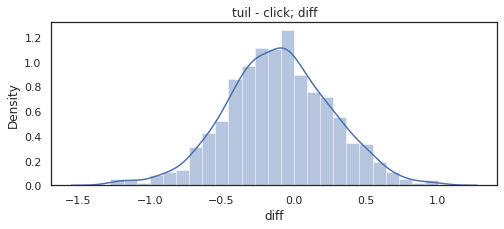

In [20]:
sns.set(rc={'figure.figsize':(8,3)})
sns.set_style("white")
    
ax = sns.distplot(dm["diff"])

save_fig(ax, "tuil - click; diff", "dist_diff.pdf")

/home/sgoering/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


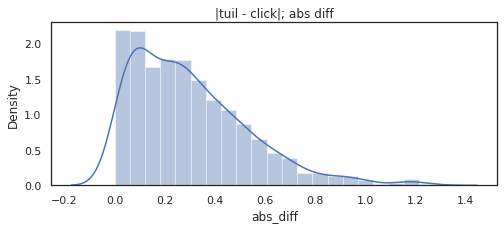

In [21]:
ax = sns.distplot(dm["abs_diff"])

save_fig(ax, "|tuil - click|; abs diff", "dist_abs_diff.pdf")

pixabay_first50k/medium/castle-2744263.jpg


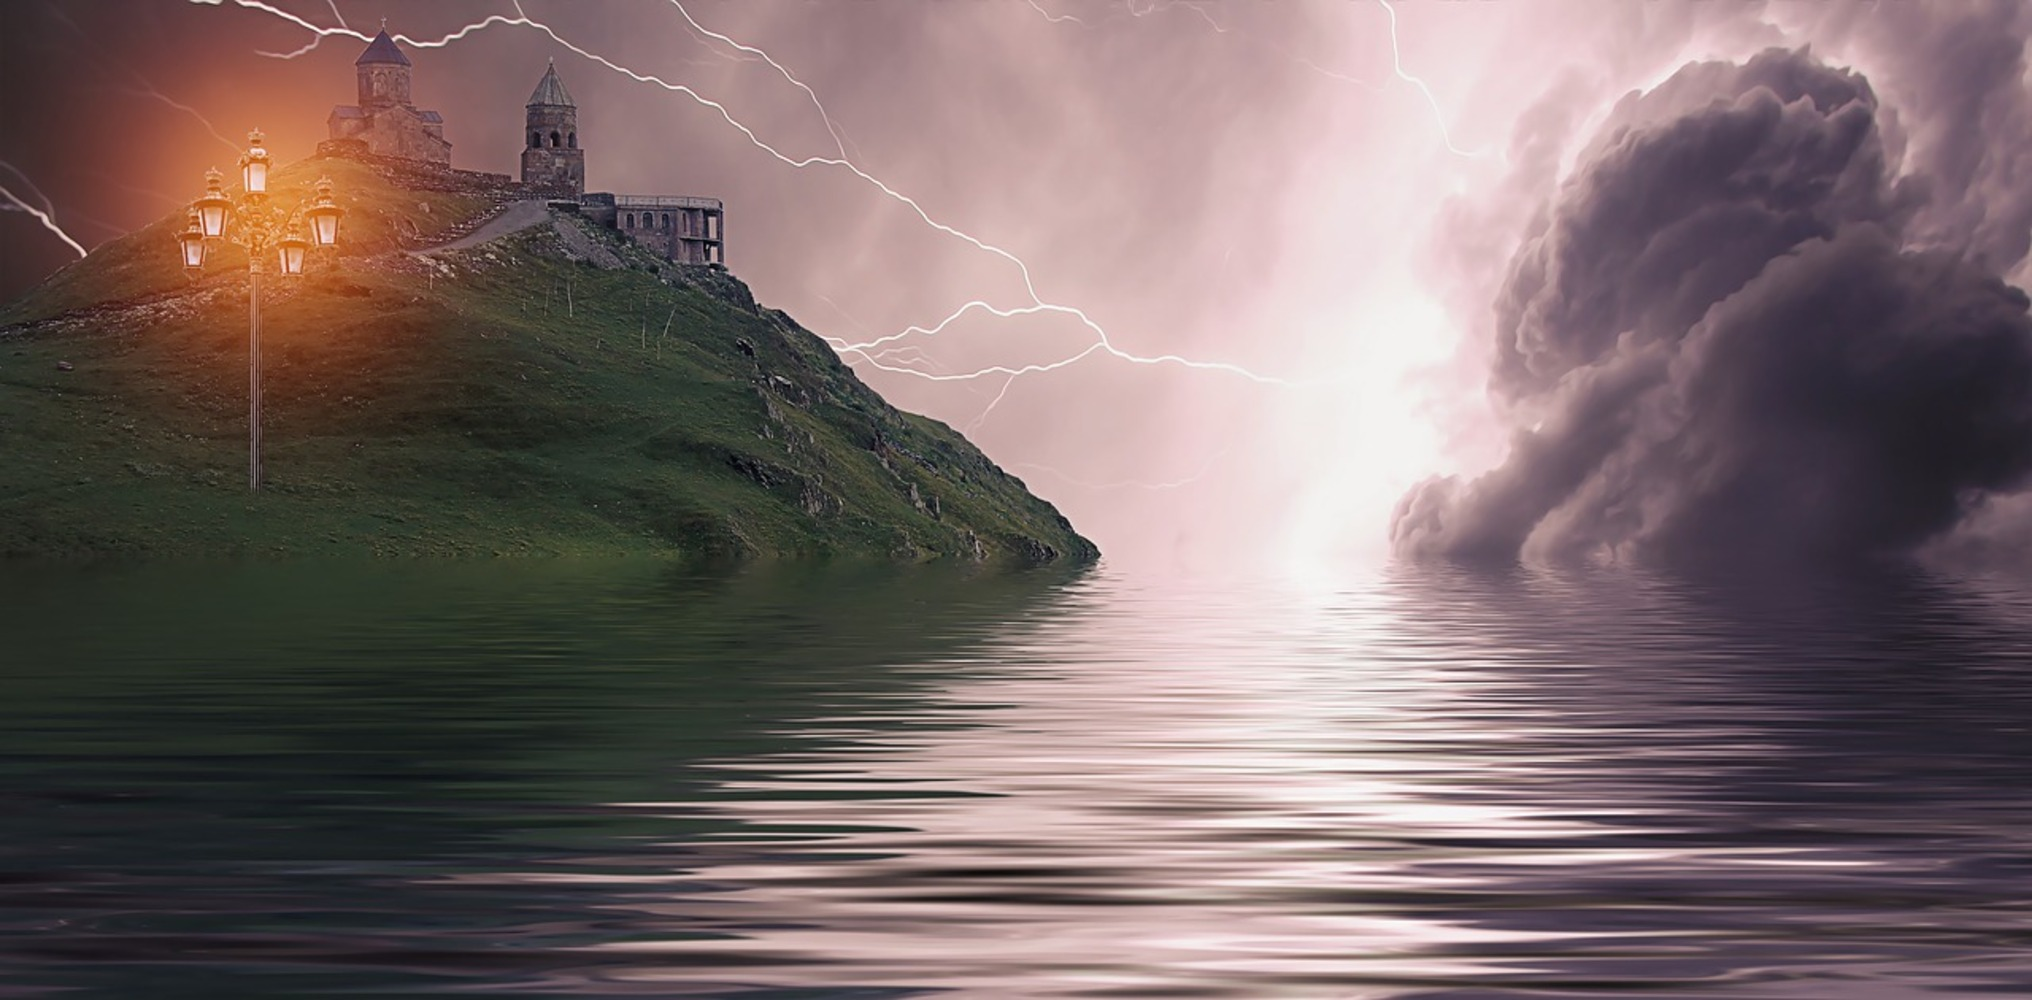

ava/medium/263151.jpg


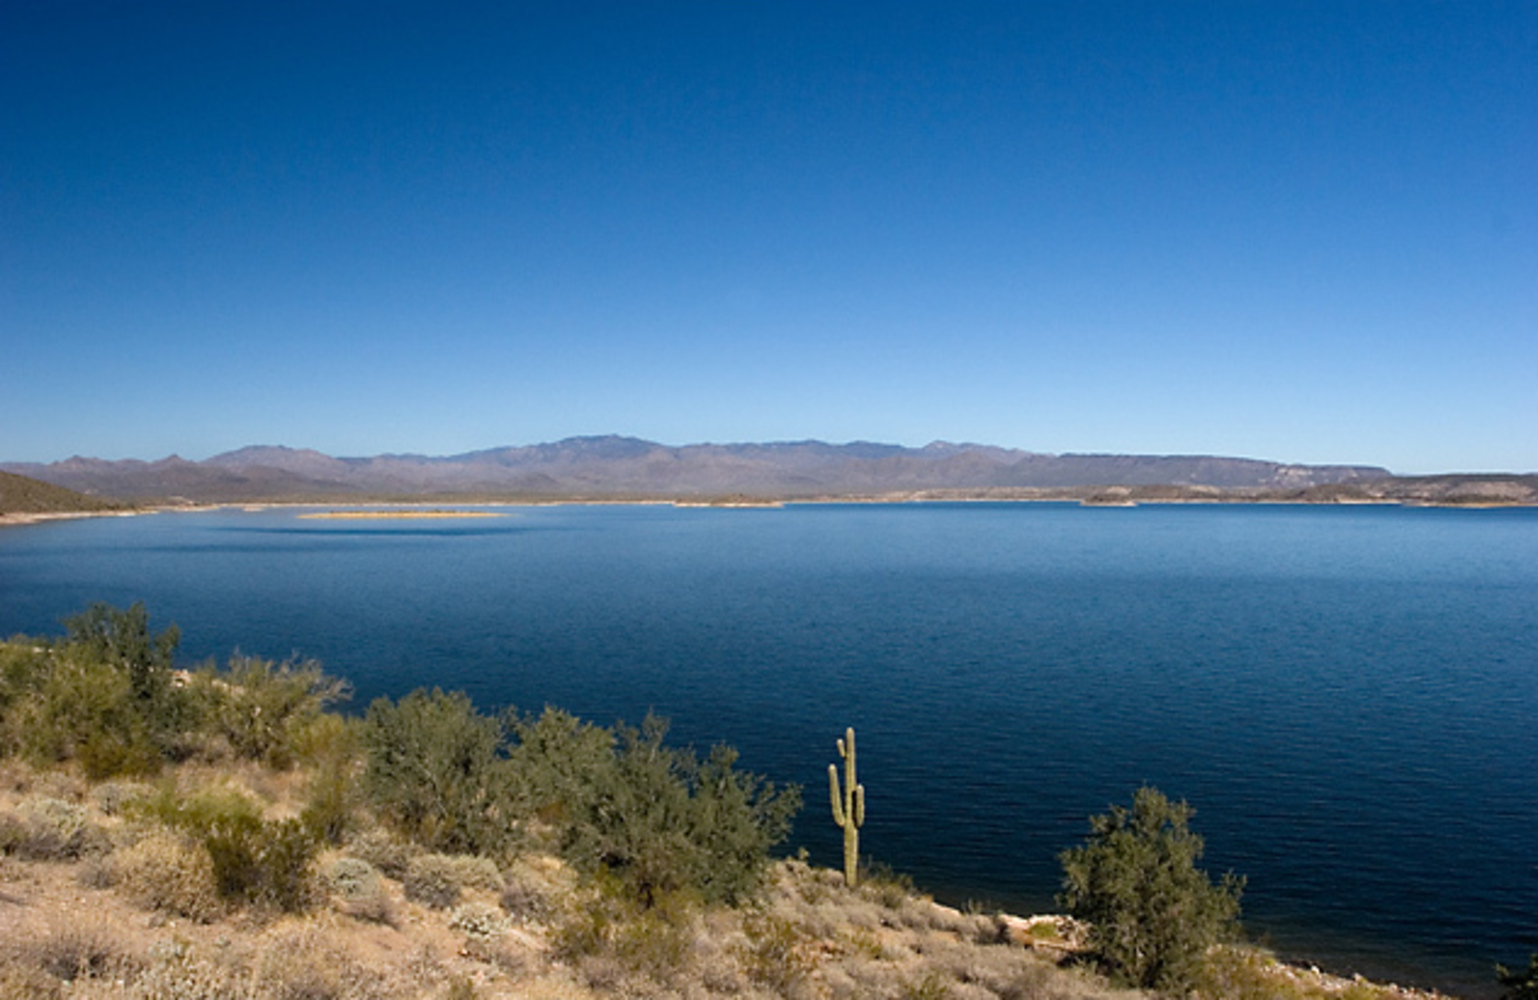

500px_cc0/medium/107515765_Tomato_blossom.jpg


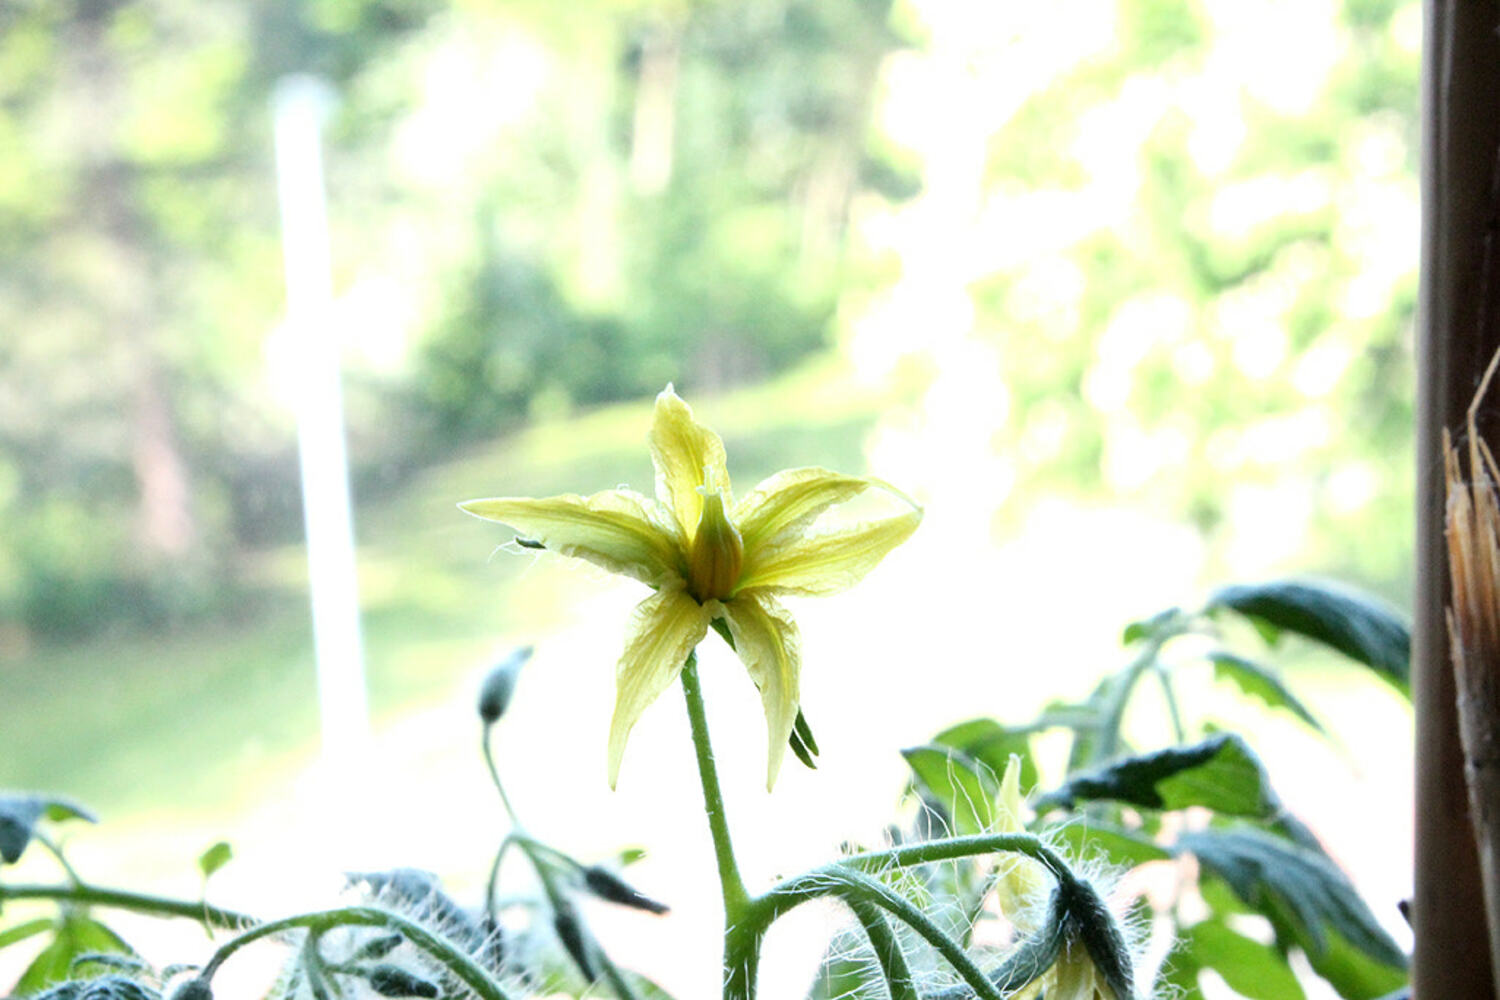

ava/medium/534049.jpg


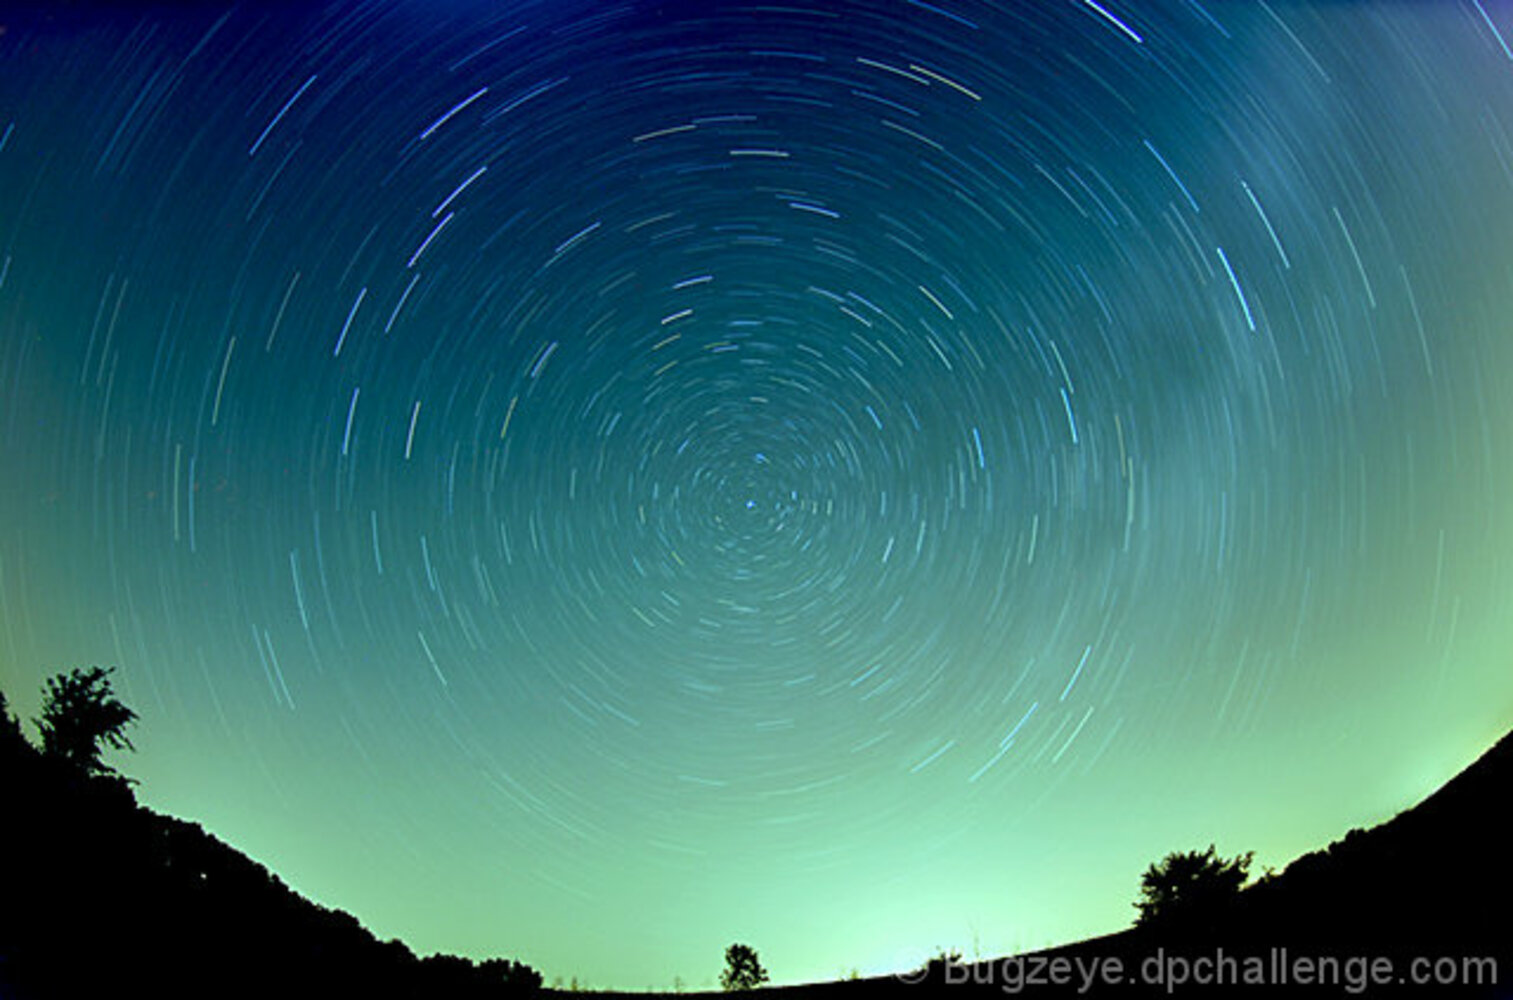

koniq10k/medium/2416231204.jpg


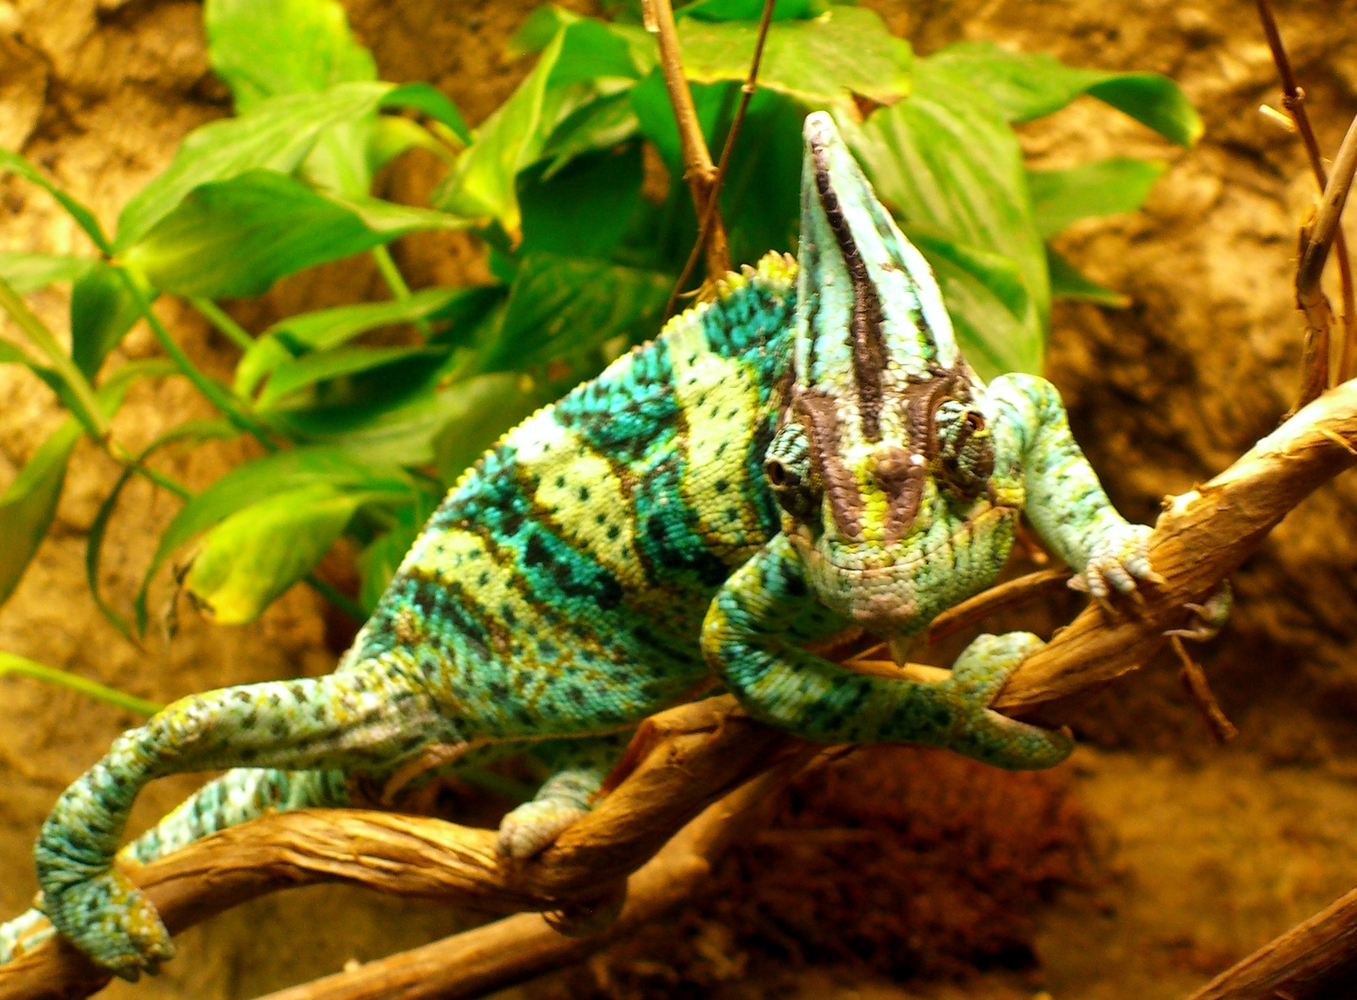

In [39]:
!mkdir -p "tmp/worst_diff"
for i, r in dm.head(5).iterrows():
    print(r["filename"])
    show_img(r["filename"])
    bn = os.path.basename(r["filename"])
    bn = bn + "_" + str(round(r["abs_diff"], 2)) + ".jpg"
    os.system(f"""cp {r["filename"]} tmp/worst_diff/{bn}""")

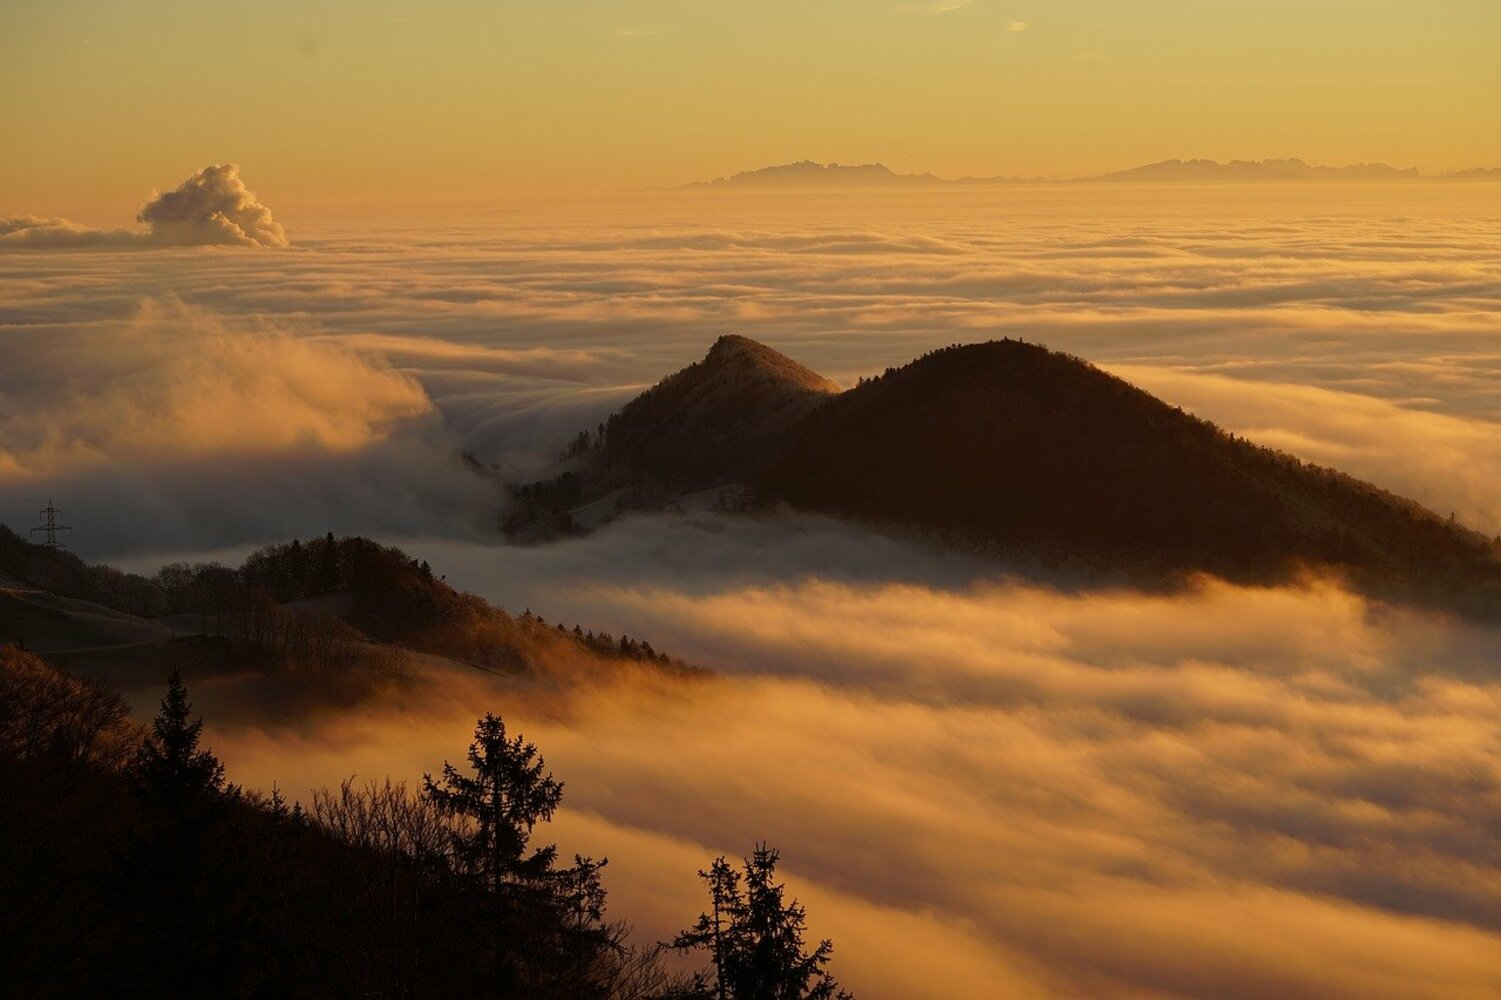

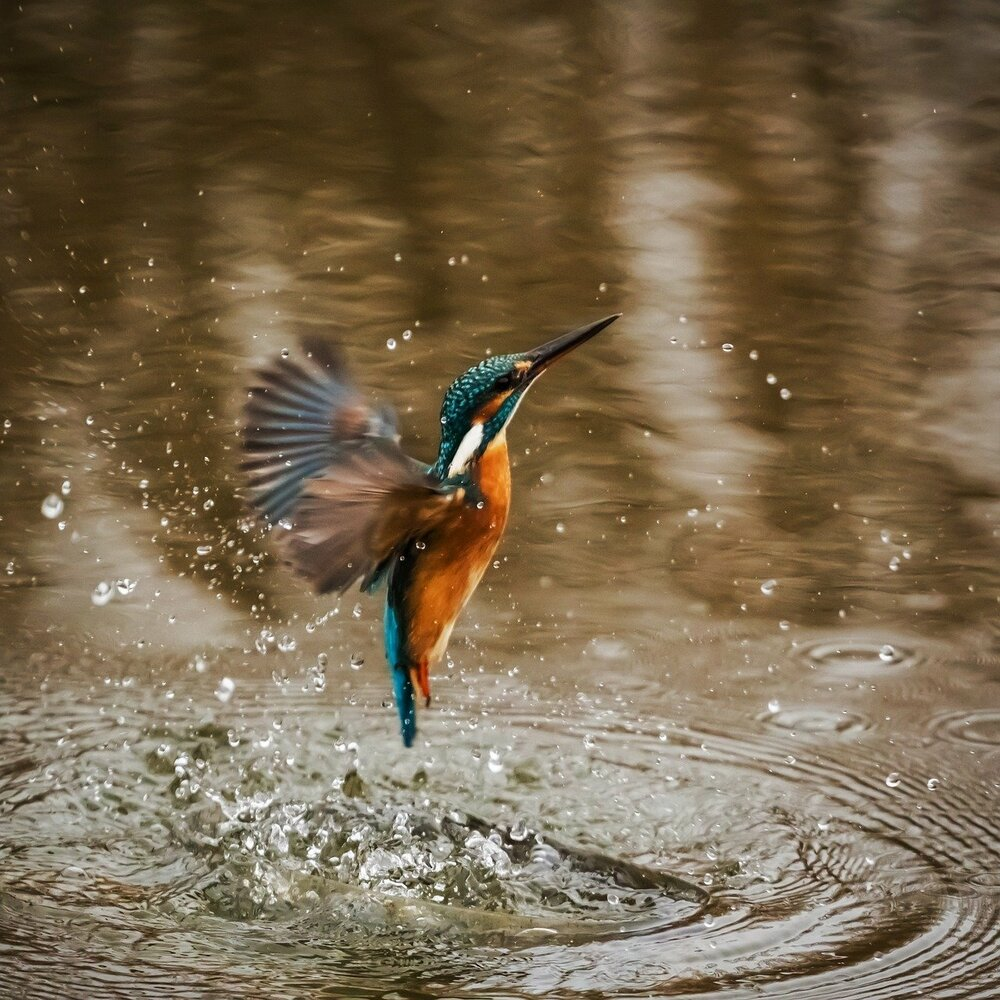

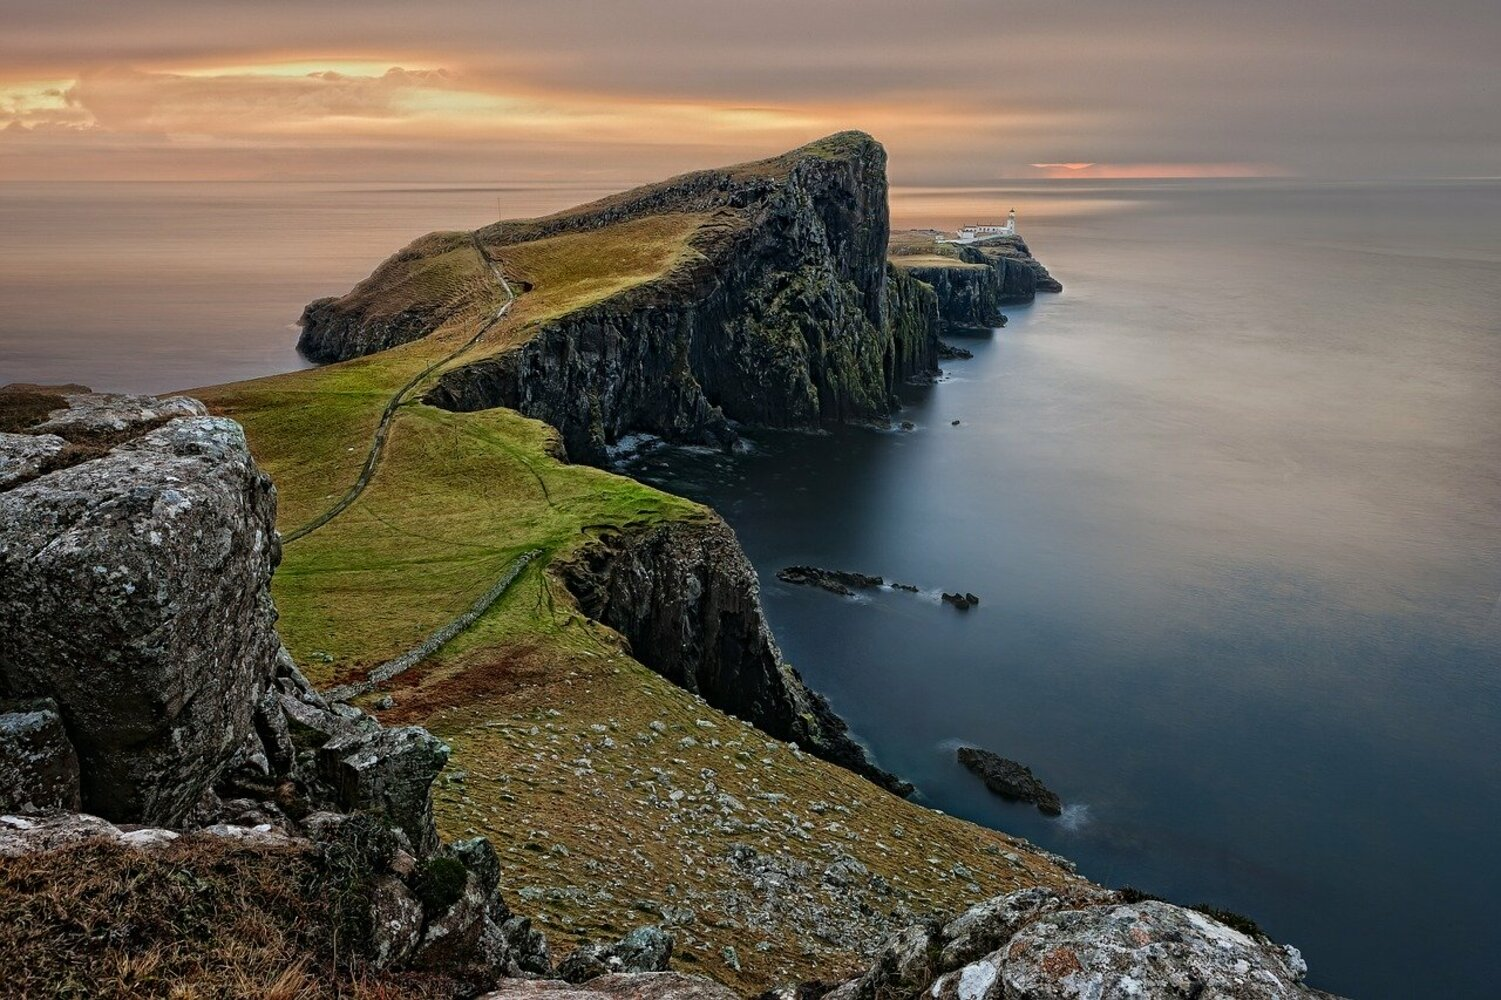

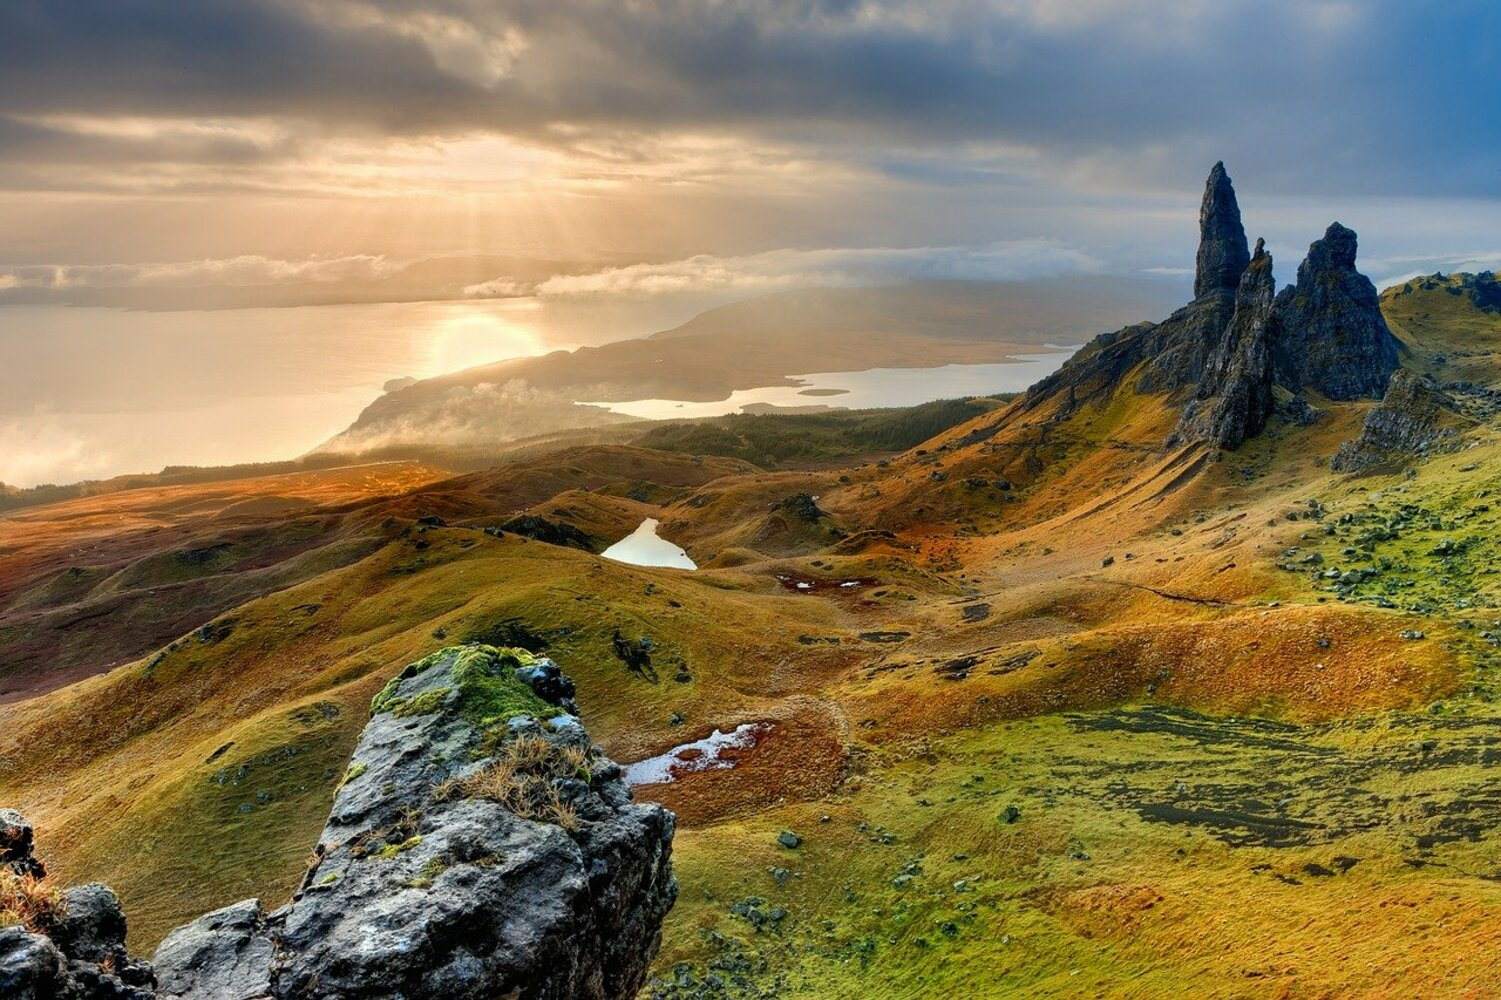

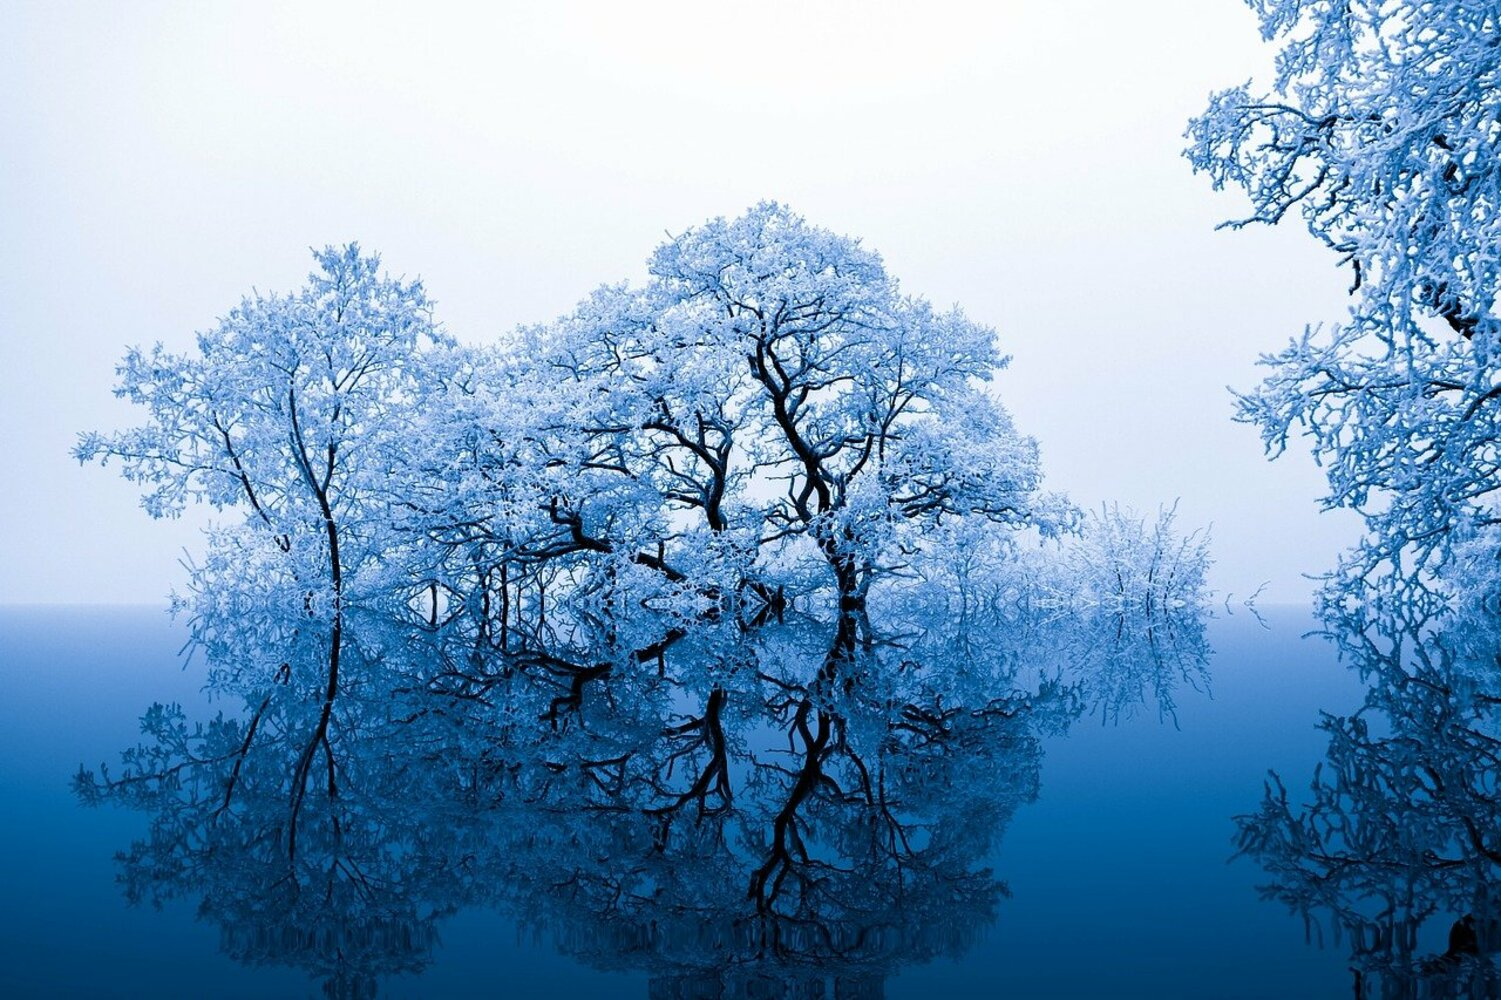

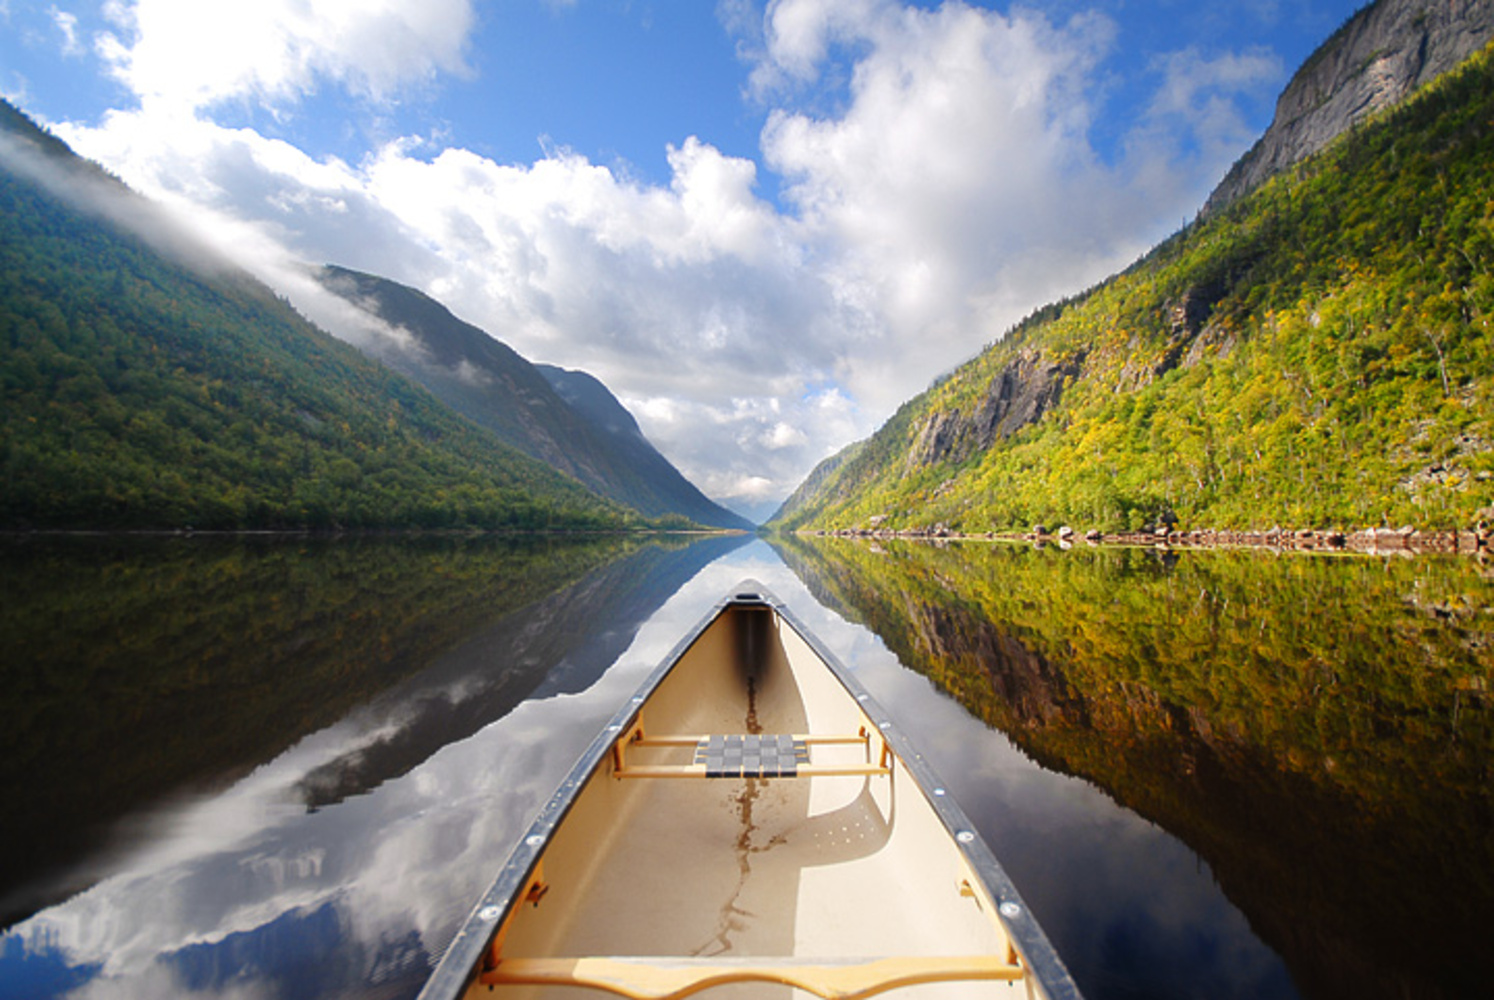

In [36]:
# checkout top-3 rated images of click/tuil
!mkdir -p "tmp/top3"
for i, r in dm.sort_values(by="mos_click", ascending=False).head(3).iterrows():
    show_img(r["filename"])
    bn = os.path.basename(r["filename"])
    bn = bn + "_" + str(round(r["mos_click"], 2)) + ".jpg"
    os.system(f"""cp {r["filename"]} tmp/top3/click_{bn}""")

for i, r in dm.sort_values(by="mos_tuil", ascending=False).head(3).iterrows():
    show_img(r["filename"])
    bn = os.path.basename(r["filename"])
    bn = bn + "_" + str(round(r["mos_tuil"], 2)) + ".jpg"
    os.system(f"""cp {r["filename"]} tmp/top3/tuil_{bn}""")
     

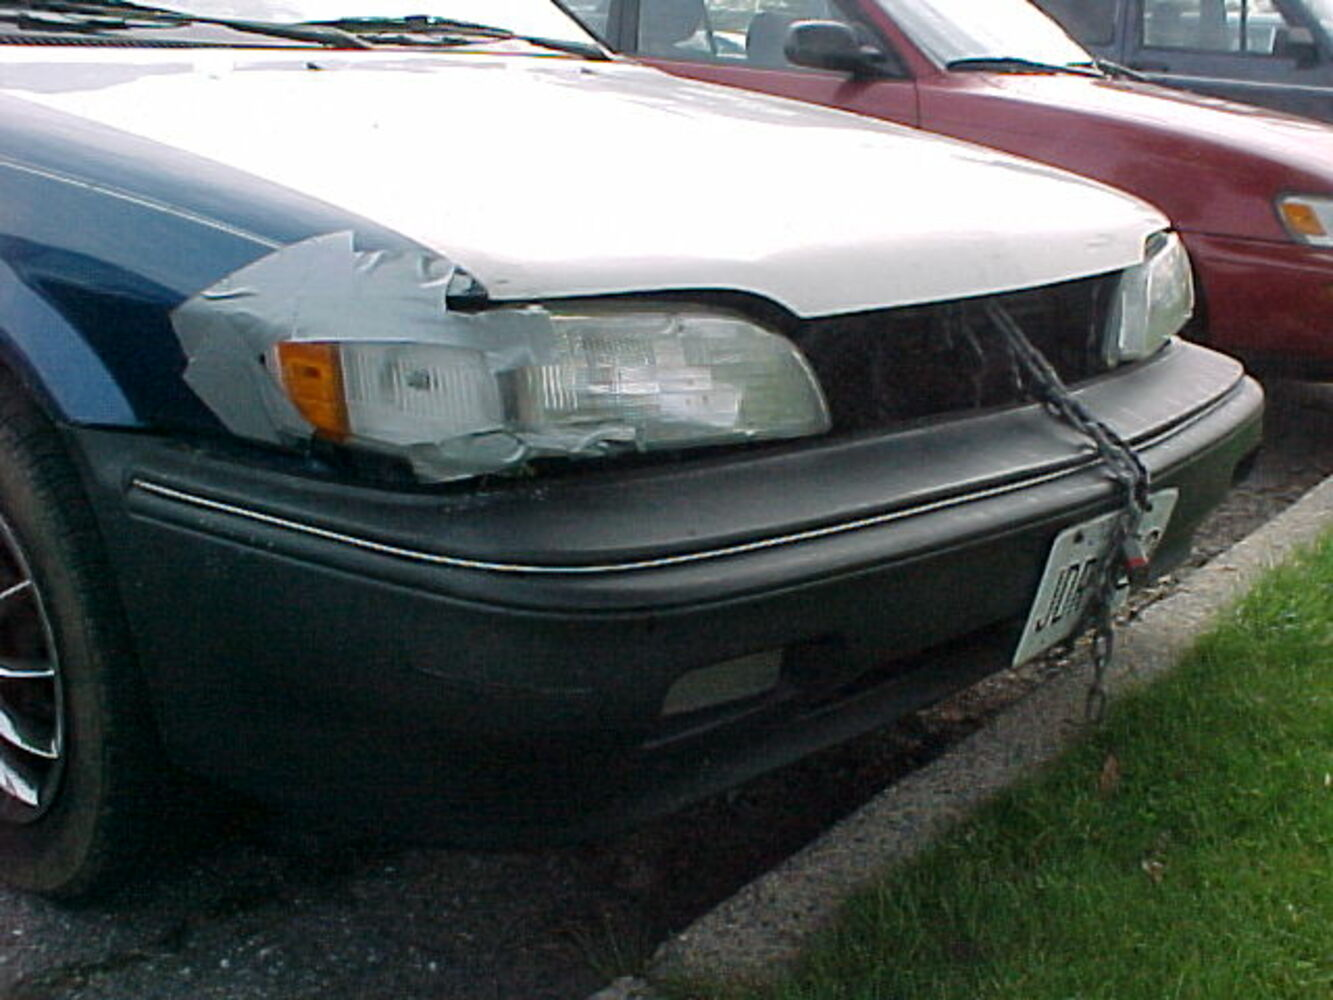

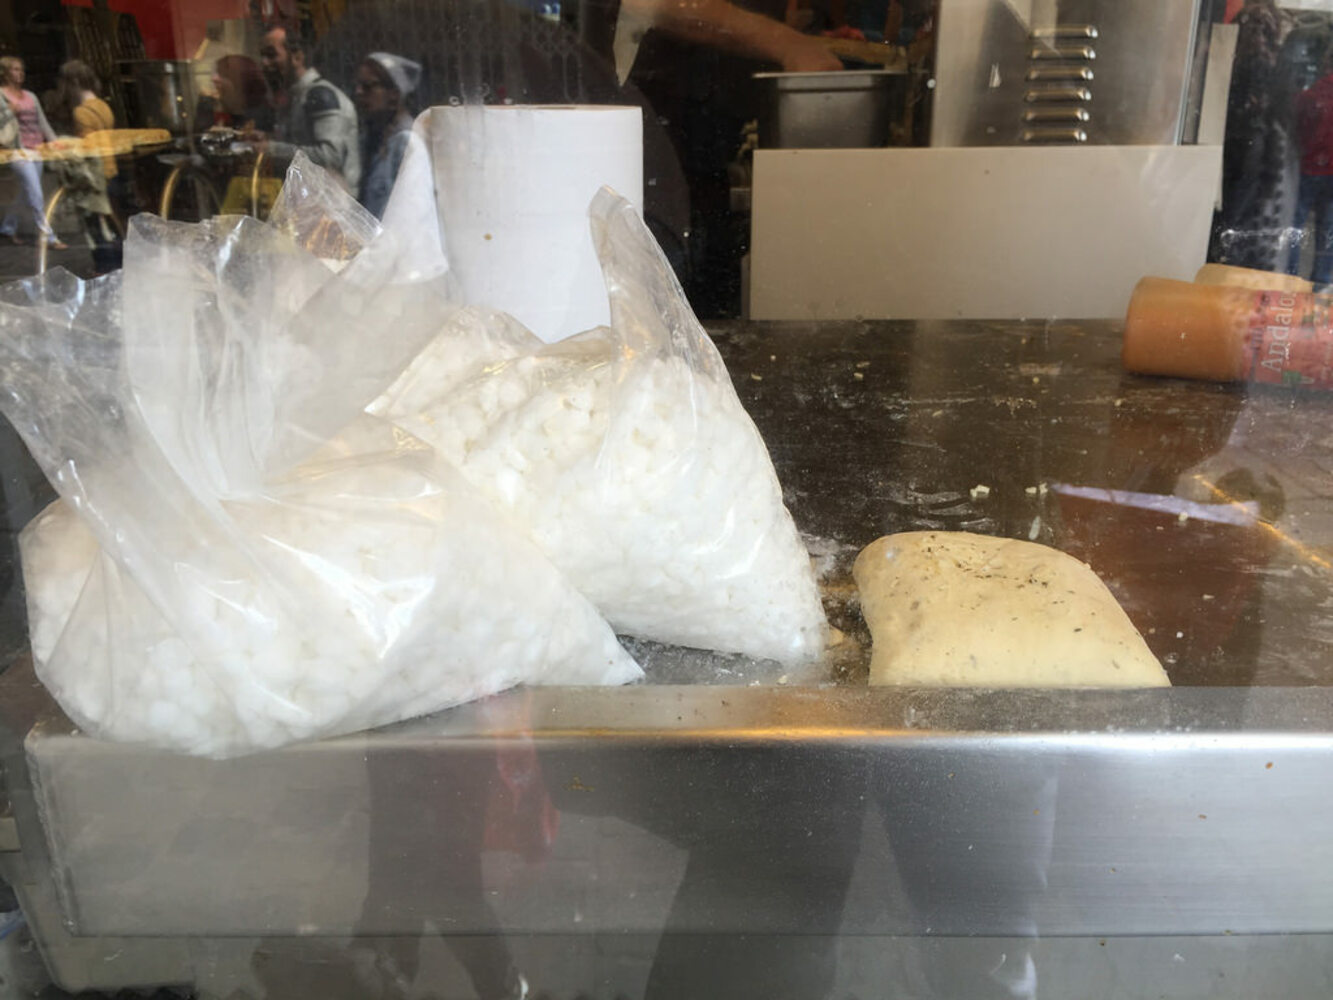

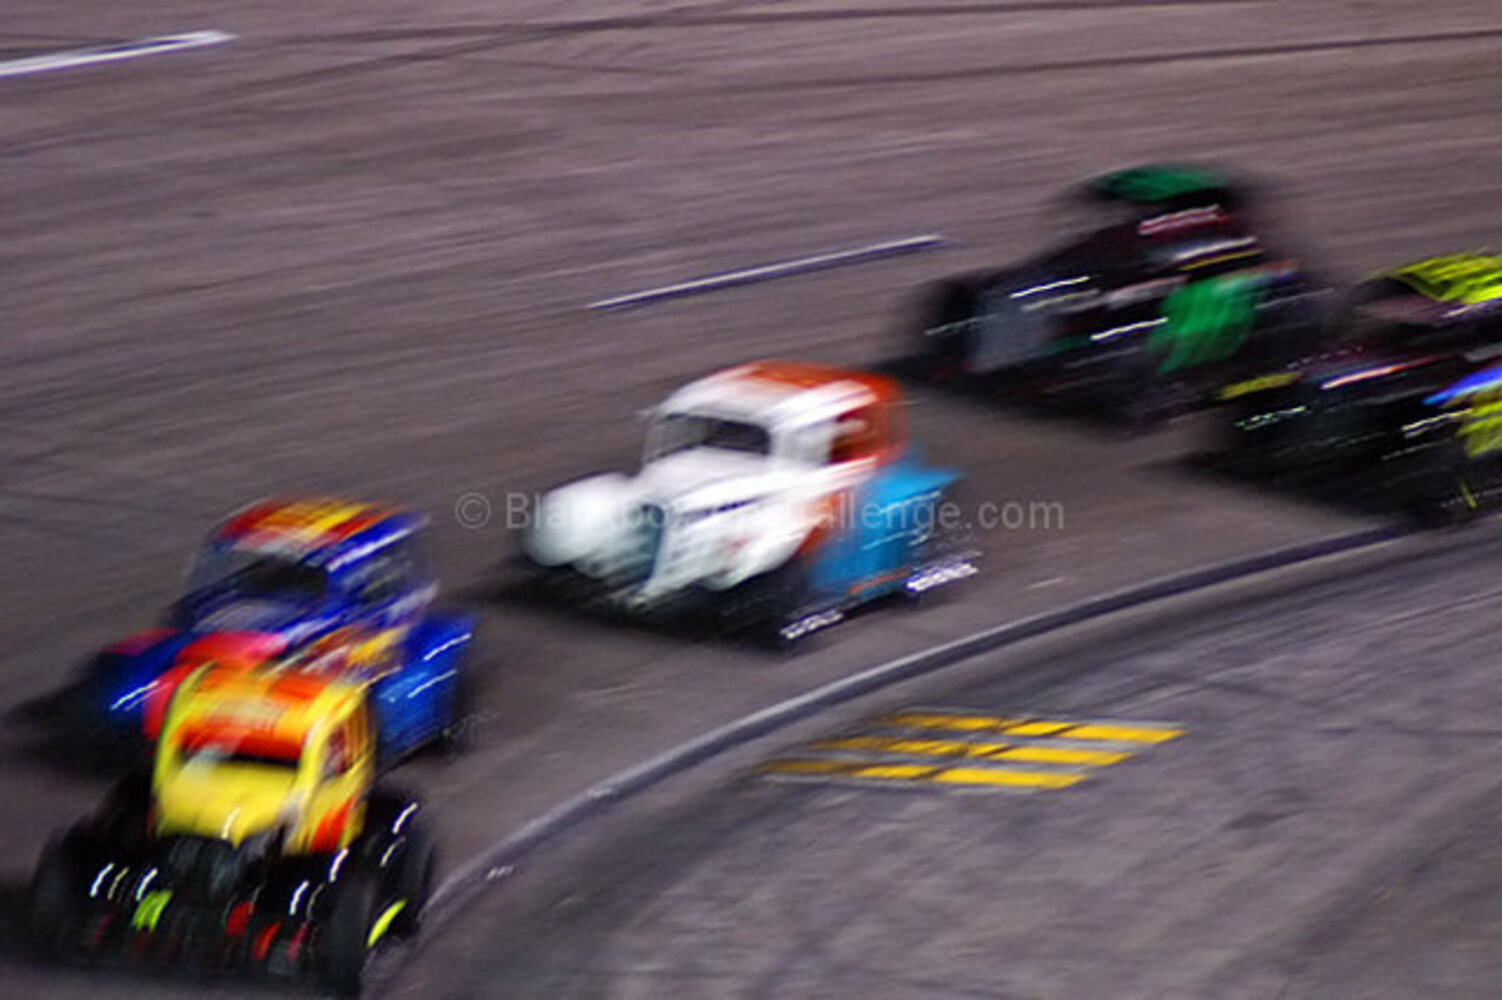

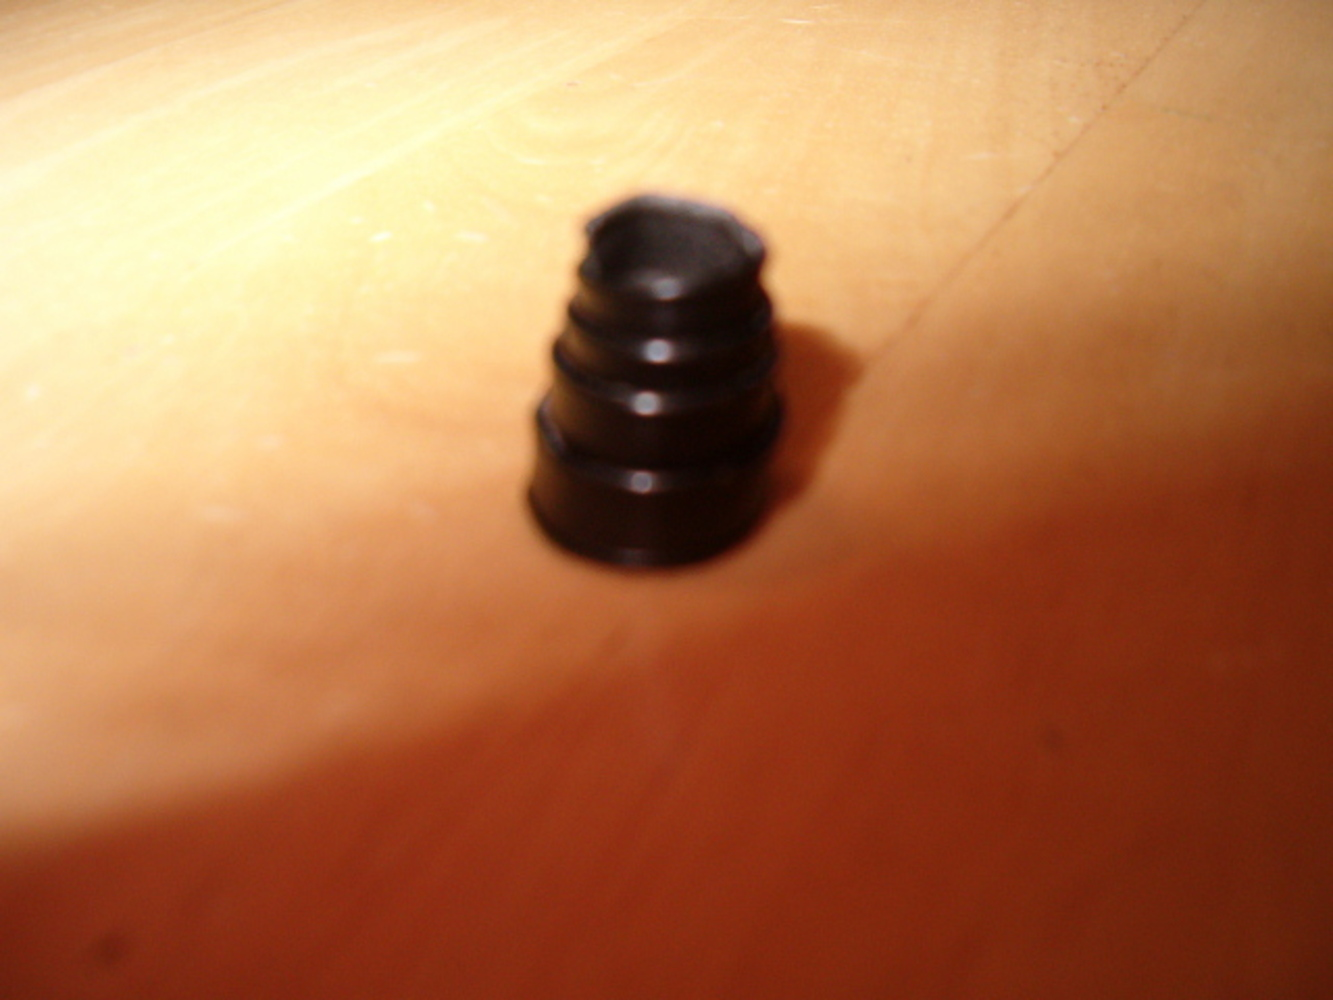

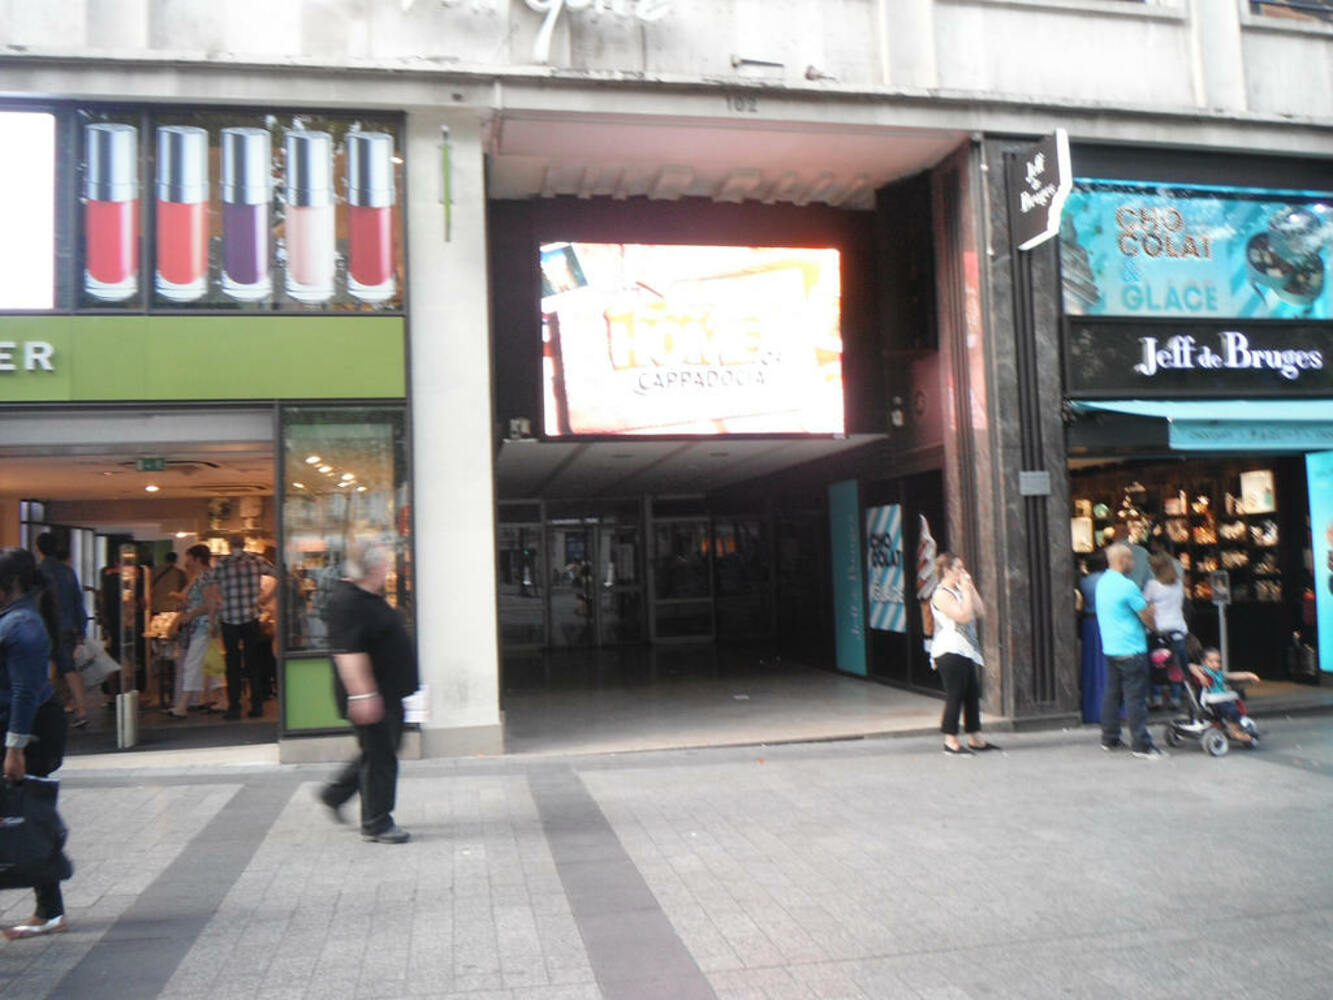

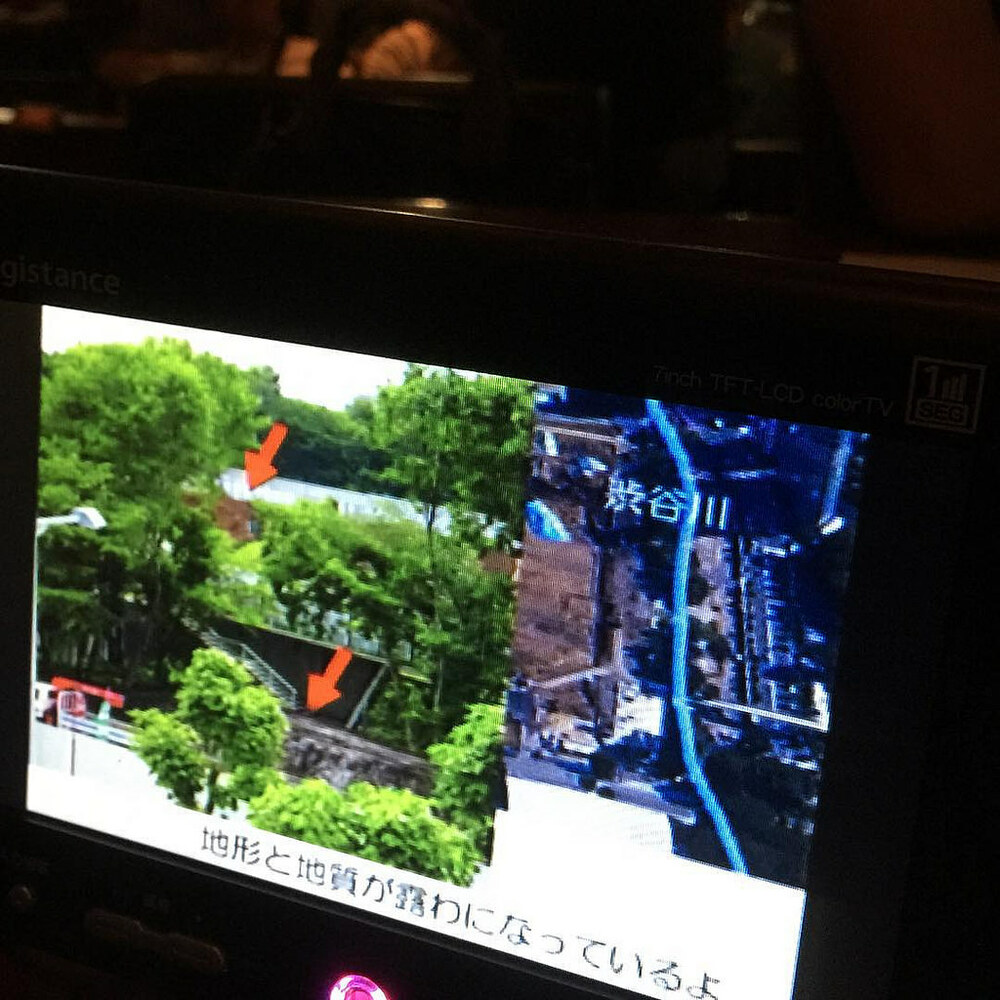

In [38]:
# checkout worst-3 rated images of click/tuil
!mkdir -p "tmp/worst3"
for i, r in dm.sort_values(by="mos_click", ascending=True).head(3).iterrows():
    show_img(r["filename"])
    bn = os.path.basename(r["filename"])
    bn = bn + "_" + str(round(r["mos_click"], 2)) + ".jpg"
    os.system(f"""cp {r["filename"]} tmp/worst3/click_{bn}""")

for i, r in dm.sort_values(by="mos_tuil", ascending=True).head(3).iterrows():
    show_img(r["filename"])
    bn = os.path.basename(r["filename"])
    bn = bn + "_" + str(round(r["mos_tuil"], 2)) + ".jpg"
    os.system(f"""cp {r["filename"]} tmp/worst3/tuil_{bn}""")
     